In [1]:
from helper_funcs import *

# Colourblind friendly colours
import tol_colors as tc
cset = tc.tol_cset('bright')
plt.rc('axes', prop_cycle=plt.cycler('color', list(cset)))

fsize = 24
plt.rcParams.update({'font.size': fsize})


dynamics_path = '../publication/dynamics/'
static_path = '../publication/static_tests/'

tmap = {
    'npt_000conEC_298K':'EMC (298$\,$K)',
    'npt_033conEC_298K':'EC:EMC (3:7) (298$\,$K)',
    'npt_066conEC_298K':'EC:EMC (7:3) (298$\,$K)',
    'npt_100conEC_313K':'EC (313$\,$K)',
}

conmap = {
    '000conEC':'EMC (298$\,$K)',
    '033conEC':'EC:EMC (3:7) (298$\,$K)',
    '066conEC':'EC:EMC (7:3) (298$\,$K)',
    '100conEC':'EC (313$\,$K)',
}

In [454]:
tags = [
    'SDN22NQQ/wB97X/SEED1/DSET1',
    'SDN22NQQ/wB97X/SEED1/DSET2',
    'SDN22NQQ/wB97X/SEED1/DSET3',
    'SDN22NQQ/wB97X/SEED2/DSET1',
    'SDN22NQQ/wB97X/SEED3/DSET1',
    'SDN22NQ/wB97X/SEED1/DSET1',
    'SDN22NQ/wB97X/SEED1/DSET2',
    'SDN22NQ/wB97X/SEED1/DSET3',
    'SDN22NQ/wB97X/SEED2/DSET1',
    'SDN22NQ/wB97X/SEED3/DSET1',
    'SDN22N/wB97X/SEED1/DSET1',
    'SDN22N/wB97X/SEED2/DSET1',
    'SDN22N/wB97X/SEED3/DSET1',
] # These tags needs to be adjusted to be compliant with zenodo

# Data set statistics

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from aseMolec import anaAtoms as aa
from ase.io import read

SD22NQQ = read(f'{static_path}/SDN22NQQ/wB97X/SEED1/DSET1/train_data/SD22NQQ1_wB97XD3BJ_Psi4.xyz', ':')
SD22NQ = read(f'{static_path}/SDN22NQ/wB97X/SEED1/DSET1/train_data/SD22NQ1_wB97XD3BJ_Psi4.xyz', ':')
SD22N = read(f'{static_path}/SDN22N/wB97X/SEED1/DSET1/train_data/SD22N_wB97XD3BJ_Psi4.xyz', ':')

stats_SD2N   = np.histogram(np.array([at.info['Nmols'] for at in SD22N]), [1,2,3,4,5,6,7])[0]
stats_SD2NQ  = np.histogram(np.array([at.info['Nmols'] for at in SD22NQ]), [1,2,3,4,5,6,7])[0]
stats_SD2NQQ = np.histogram(np.array([at.info['Nmols'] for at in SD22NQQ]), [1,2,3,4,5,6,7])[0]

In [34]:
try:
    stats_df = pd.read_pickle("./cluster_stats.pkl")
except:
    stats_dict = {'SD22N':stats_SD2N, 'SD22NQ':stats_SD2NQ, 'SD22NQQ':stats_SD2NQQ}
    stats_df = pd.DataFrame(stats_dict)#.index.name('Cluster size')
    stats_df.index.name = 'Cluster size, $N_\\text{mols}$'
    stats_df.index += 1
    pd.to_pickle(stats_df, "./cluster_stats.pkl")
stats_df

,SD22N,SD22NQ,SD22NQQ
"Cluster size, $N_\text{mols}$",,,
1,77880,7880,900
2,82253,18253,1470
3,37176,10176,2001
4,17787,4787,1917
5,6464,1464,1464
6,264,264,264


In [ ]:
tot = stats_df.aggregate('sum', axis=0)
stats_dist_df = stats_df/tot
clusters = np.arange(1, len(stats_dist_df)+1)
print(clusters)
expectation = (stats_dist_df*clusters[:,None]).aggregate('sum', axis=0).round(decimals=1)
print(expectation)
SD22N_cluster_size, SD22NQ_cluster_size, SD22NQQ_cluster_size = expectation

stats_dist_df

[1 2 3 4 5 6]
SD22N      2.1
SD22NQ     2.4
SD22NQQ    3.3
dtype: float64


,SD22N,SD22NQ,SD22NQQ
"Cluster size, $N_\text{mols}$",,,
1,0.351089,0.184009,0.112275
2,0.370803,0.426233,0.183383
3,0.167592,0.237624,0.249626
4,0.080185,0.111783,0.239147
5,0.029140,0.034186,0.182635
6,0.001190,0.006165,0.032934


In [ ]:
try:
    SD22N_comp_flat = pd.read_pickle("./SD22N_stats.pkl")
except:
    SD22N = read(f'{static_path}/SDN22N/wB97X/SEED1/DSET1/train_data/SD22N_wB97XD3BJ_Psi4.xyz', ':')
    SD22N_comp = collect_comp(SD22N)
    SD22N_comp_flat = flatten_comp(SD22N_comp)
    pd.to_pickle(SD22N_comp_flat, "./SD22N_stats.pkl")
SD22N_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,887,72354,0,0,4639
2,1069,40190,1092,9088,30814
3,178,23091,516,2433,10958
4,41,11528,189,706,5323
5,25,5322,139,344,634
6,0,0,144,110,10


In [78]:
try:
    SD22NQ_comp_flat = pd.read_pickle("./SD22NQ_stats.pkl")
except:
    SD22NQ = read(f'{static_path}/SDN22NQ/wB97X/SEED1/DSET1/train_data/SD22NQ1_wB97XD3BJ_Psi4.xyz', ':')
    SD22NQ_comp = collect_comp(SD22NQ)
    SD22NQ_comp_flat = flatten_comp(SD22NQ_comp)
    pd.to_pickle(SD22NQ_comp_flat, "./SD22NQ_stats.pkl")
SD22NQ_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,887,2354,0,0,4639
2,1069,190,1092,9088,6814
3,178,1091,516,2433,5958
4,41,1528,189,706,2323
5,25,322,139,344,634
6,0,0,144,110,10


In [ ]:
try:
    SD22NQQ_comp_flat = pd.read_pickle("./SD22NQQ_stats.pkl")
except:
    SD22NQQ = read(f'{static_path}/SDN22NQQ/wB97X/SEED1/DSET1/train_data/SD22NQQ1_wB97XD3BJ_Psi4.xyz', ':')
    SD22NQQ_comp = collect_comp(SD22NQQ)
    SD22NQQ_comp_flat = flatten_comp(SD22NQQ_comp)
    pd.to_pickle(SD22NQQ_comp_flat, "./SD22NQQ_stats.pkl")
SD22NQQ_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,150,150,0,0,600
2,70,70,70,560,700
3,40,40,220,1073,628
4,41,200,189,706,781
5,25,322,139,344,634
6,0,0,144,110,10


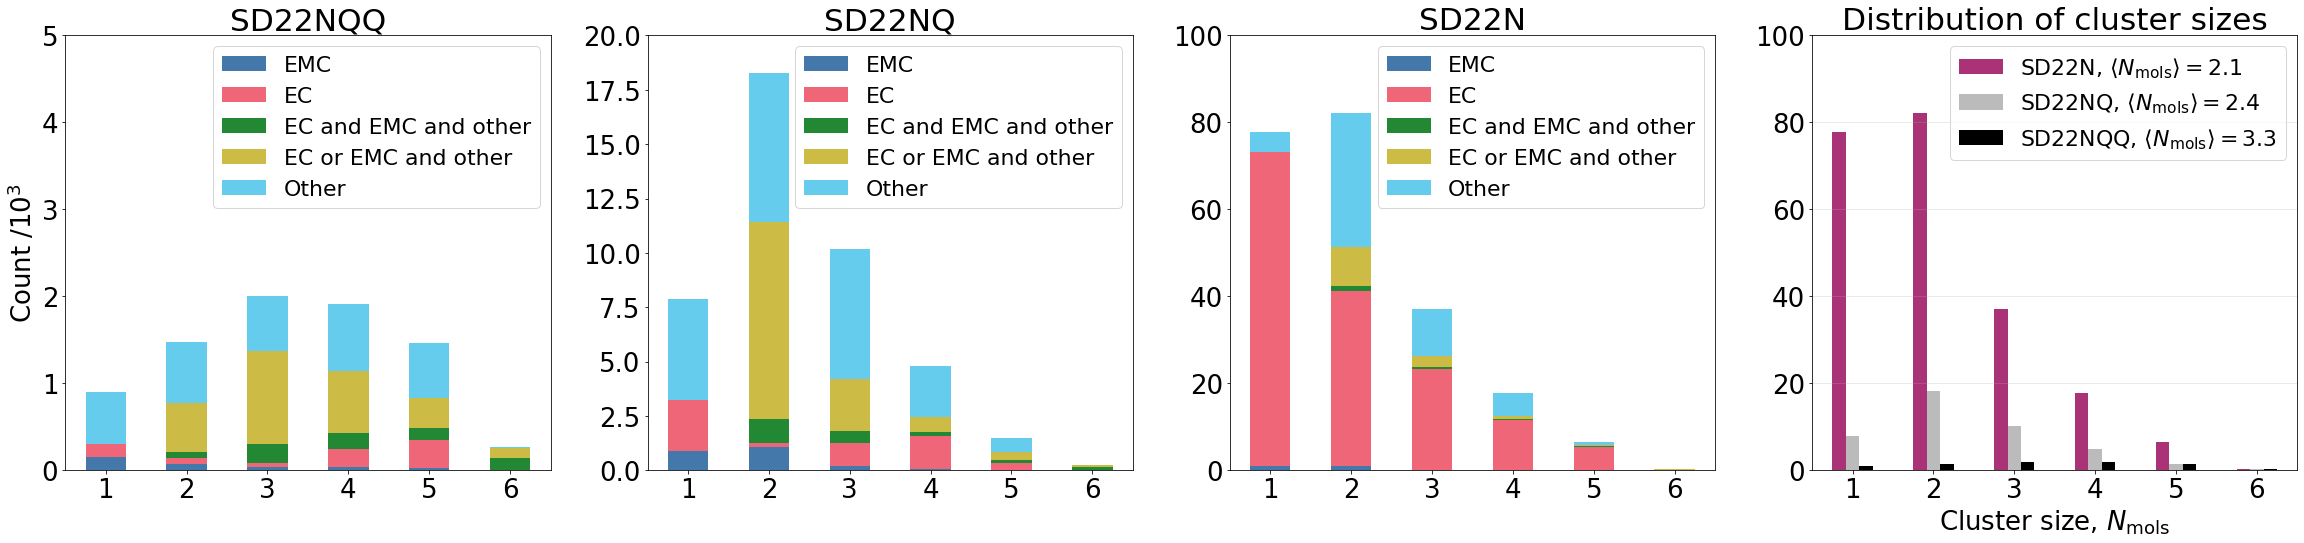

In [295]:
fsize = 26
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(1,4, figsize=(10*4, 8*1), sharey=False)
comps = {
    'SD22NQQ':SD22NQQ_comp_flat,
    'SD22NQ':SD22NQ_comp_flat,
    'SD22N':SD22N_comp_flat,
}
for i, (ax, (name, data)) in enumerate(zip(axs, comps.items())):
    d = data/1e3
    if i == 0:
        ax.set_ylim([0,5])
    elif i == 1:
        ax.set_ylim([0,20])
    elif i == 2:
        ax.set_ylim([0,100])


    d.plot.bar(ax=ax, legend=False, stacked=True, rot=0)
    #ax.set_yscale('log')
    ax.legend(fontsize=fsize-4, ncols=1)
    ax.set_title(name)
axs[0].set_ylabel('Count /$10^3$')

axs[-1].set_title('Distribution of cluster sizes')
scaled_stats_df = stats_df/1e3
scaled_stats_df.plot.bar(
#stats_df.plot.bar(
    #ylabel='Count /$10^4$',
	rot=0,
	ax=axs[-1],
    color=cset[5:],
)
axs[-1].set_ylim([0,100])

axs[-1].grid(axis='y', alpha=0.3)
axs[-1].legend(
    [
        f'SD22N, $\\langle N_\\text{{mols}} \\rangle = {SD22N_cluster_size}$',
        f'SD22NQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQ_cluster_size}$',
        f'SD22NQQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQQ_cluster_size}$',
    ],
    fontsize=fsize-4,
)

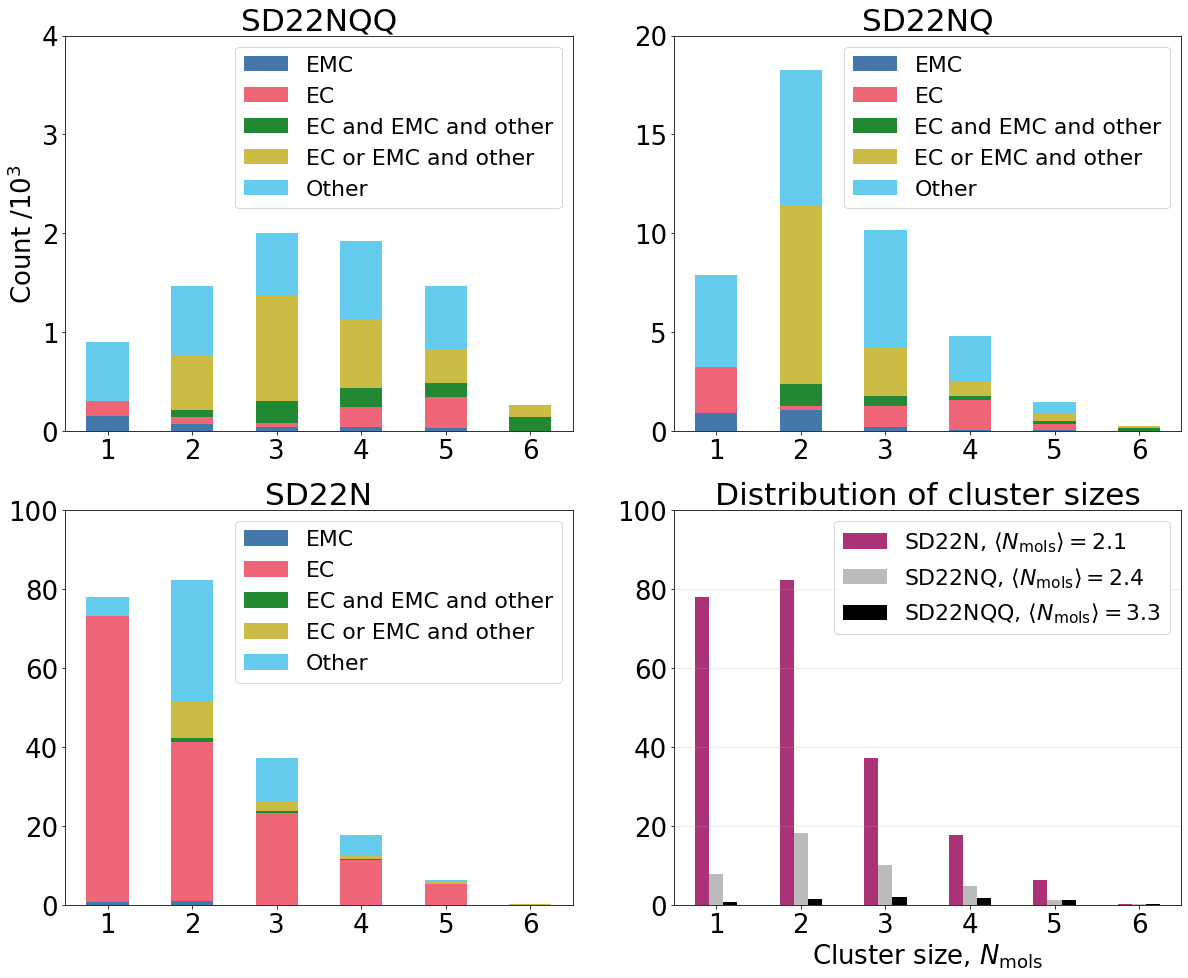

In [296]:
fsize = 26
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,2, figsize=(10*2, 8*2), sharey=False)
comps = {
    'SD22NQQ':SD22NQQ_comp_flat,
    'SD22NQ':SD22NQ_comp_flat,
    'SD22N':SD22N_comp_flat,
}
axs = axs.ravel()
for i, (ax, (name, data)) in enumerate(zip(axs, comps.items())):
    d = data/1e3
    if i == 0:
        ax.set_ylim([0,4])
    elif i == 1:
        ax.set_ylim([0,20])
    else:
        ax.set_ylim([0,100])

    d.plot.bar(ax=ax, legend=False, stacked=True, rot=0)
    #ax.set_yscale('log')
    ax.legend(fontsize=fsize-4, ncols=1)
    ax.set_title(name)

axs[0].set_ylabel('Count /$10^3$')

axs[-1].set_title('Distribution of cluster sizes')
scaled_stats_df = stats_df/1e3
scaled_stats_df.plot.bar(
#stats_df.plot.bar(
    #ylabel='Count /$10^4$',
	rot=0,
	ax=axs[-1],
    color=cset[5:],
)
axs[-1].set_ylim([0,100])

axs[-1].grid(axis='y', alpha=0.3)
axs[-1].legend(
    [
        f'SD22N, $\\langle N_\\text{{mols}} \\rangle = {SD22N_cluster_size}$',
        f'SD22NQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQ_cluster_size}$',
        f'SD22NQQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQQ_cluster_size}$',
    ],
    fontsize=fsize-4,
)

# NPT dynamics, part A

In [455]:
thermo = dict()
for tag in tags:
    thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

## Determining diffusion limit start times
### Taken from *Best Practices for Computing Transport Properties 1. Self-Diffusivity and Viscosity from Equilibrium Molecular Dynamics [Article v1.0]*
#### 5.2.3 Data analysis
In order to obtain reliable estimates of D, it is important to consider how the linear regression is performed for the MSD with respect to time (Equation 2). Specifically, the time interval that is included in the regression can have a significant impact on the predicted value of D. We recommend that only the “middle” of the MSD be used in the fit to approximate the long-time slope. Short time must be excluded as it follows a ballistic trajectory, while very long time is excluded due to the increased noise. **Currently, we are unaware of an objective approach for defining the “middle” region. Until such an approach exists, we recommend that the author reports how the region was selected and how much variability in D can be attributed to the choice of this region**. In addition, the uncertainty in the fit of the slope should be reported.

A typical log-log plot, borrowed from Ref. [36], is provided in Figure 2, where the linear regression to the “middle” region is included. From visual inspection, the “ballistic” short-time interval ranges from the beginning of the simulation to approximately 100 ps. **The “middle” region is identified by the linear regime with a slope of 1 (for a log-log plot)** spanning from approximately 100 ps to 1000 ps. Note that the noisy “long-time” simulation data (beyond 1000 ps) are not depicted in Figure 2 and are excluded from the linear fit.

In [457]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=1e-3, min_steps=5e3)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.001
64128 99997 0.9485280676333906 3.9143297288495307e-10 5.6516889939825344e-12 0.9487089316481923
Using slope error thresold of: 0.001


/home/viktor/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/viktor/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/viktor/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Using slope error thresold of: 0.001
73853 99999 0.9472266644034211 2.534736113964102e-10 4.354231175375296e-12 0.9471656303733829
Using slope error thresold of: 0.001
63370 99998 0.9338944342314899 2.2190013657090396e-10 3.6090639545758616e-12 0.9345318275392056
Using slope error thresold of: 0.001
78693 81083 0.20800379067987332 2.835659618889953e-10 1.3142016238833553e-10 0.21253103614132907
Using slope error thresold of: 0.001
5488 81941 0.9819833741171156 3.184210640158003e-10 2.0391716087167027e-12 0.9778313789716246
Using slope error thresold of: 0.001
49179 82071 0.9466052217893475 1.6624657529834809e-10 2.4030754995641846e-12 0.952662874440081
Using slope error thresold of: 0.001
33503 84271 0.9778938541977784 2.699404124005585e-10 1.8227140936819767e-12 0.983539364832072
Using slope error thresold of: 0.001
51736 99999 0.9483264826938009 4.954568695632598e-10 6.123209341260578e-12 0.9493976696865638
Using slope error thresold of: 0.001
98022 99999 0.1850515081560201 2.8870435

- Yellow: Below 0.95
- Orange: Below 0.90
- Red: Below 0.80

In [459]:
try:
    df = pd.read_pickle("./part3a_opt_cluster.pkl")
except:
    df, dunit = get_density(tags, dynamics_path, std=True)
    df['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
    #df['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]]
    df['Diff. fit error'] = [e*1e10 for e in diff_errs] # 1e-6 cm2/s
    df['log-log r2'] = log_r2
    df['Diff. r2'] = diff_r2
    df['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
    pd.to_pickle(df, "./part3a_opt_cluster.pkl")
df.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

/tmp/ipykernel_159951/2530497882.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])


,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,wB97X,1,1,"EMC (298$\,$K)",1.133707,0.015552,3.914330,0.056517,0.948528,0.948709,0.641290
1,SDN22NQQ,wB97X,1,1,"EC:EMC (3:7) (298$\,$K)",1.205010,0.015673,nan,nan,nan,nan,nan
2,SDN22NQQ,wB97X,1,1,"EC:EMC (7:3) (298$\,$K)",1.283700,0.016119,2.534736,0.043542,0.947227,0.947166,0.738540
3,SDN22NQQ,wB97X,1,1,"EC (313$\,$K)",1.379088,0.016214,2.219001,0.036091,0.933894,0.934532,0.633710
4,SDN22NQQ,wB97X,1,2,"EMC (298$\,$K)",1.131117,0.016579,2.835660,1.314202,0.208004,0.212531,0.786940
5,SDN22NQQ,wB97X,1,2,"EC:EMC (3:7) (298$\,$K)",1.201672,0.014779,3.184211,0.020392,0.981983,0.977831,0.054880
6,SDN22NQQ,wB97X,1,2,"EC:EMC (7:3) (298$\,$K)",1.292896,0.016199,1.662466,0.024031,0.946605,0.952663,0.491800
7,SDN22NQQ,wB97X,1,2,"EC (313$\,$K)",1.384449,0.016043,2.699404,0.018227,0.977894,0.983539,0.335030
8,SDN22NQQ,wB97X,1,3,"EMC (298$\,$K)",1.117259,0.016536,4.954569,0.061232,0.948326,0.949398,0.517370
9,SDN22NQQ,wB97X,1,3,"EC:EMC (3:7) (298$\,$K)",1.183245,0.016968,2.887044,1.594855,0.185052,0.186817,0.980240


### Lowered threshold from 0.001 to 0.01

In [14]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=1e-2, min_steps=5e3)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.01
63704 99997 0.9478129337252742 3.8845153817442477e-10 5.607245591283305e-12 0.948158485037947
Using slope error thresold of: 0.01
99229 99999 0.12359565379322501 2.3472743675293176e-10 2.658196909654313e-10 0.12346156470022872
Using slope error thresold of: 0.01
71262 99999 0.9595532420283851 2.5126597847054763e-10 3.6317398231282695e-12 0.9584007817295394
Using slope error thresold of: 0.01
62876 99998 0.9340264928977463 2.2017937315363526e-10 3.554292899470888e-12 0.9346306526967475
Using slope error thresold of: 0.01
78688 81083 0.20566660207518722 2.811512930675305e-10 1.3107668352130797e-10 0.21020348547926052
Using slope error thresold of: 0.01
5000 81941 0.9824374203421545 3.1792564487418644e-10 2.019073848449091e-12 0.9780542503453097
Using slope error thresold of: 0.01
48852 82071 0.9453787393571396 1.6510539950799222e-10 2.3947901184882135e-12 0.951901192791054
Using slope error thresold of: 0.01
33099 84271 0.9758218615901924 2.68476129505

In [59]:
try:
    bdf = pd.read_pickle("./part3a_opt_cluster-b.pkl")
except:
    bdf, dunit = get_density(tags, dynamics_path, std=True)
    bdf['Diffusion coefficient'] = [d*1e9 for d in diff_coeffs] # 1e-5 cm2/s
    #bdf['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]] # 1e-5 cm2/s
    bdf['Diff. fit error'] = [e*1e9 for e in diff_errs]
    bdf['log-log r2'] = log_r2
    bdf['Diff. r2'] = diff_r2
    bdf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
    pd.to_pickle(bdf, "./part3a_opt_cluster-b.pkl")
bdf.style.map(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,wB97X,1,1,"EMC (298$\,$K)",1.133707,0.015552,0.388452,0.005607,0.947813,0.948158,0.637050
1,SDN22NQQ,wB97X,1,1,"EC:EMC (3:7) (298$\,$K)",1.205010,0.015673,0.234727,0.265820,0.123596,0.123462,0.992310
2,SDN22NQQ,wB97X,1,1,"EC:EMC (7:3) (298$\,$K)",1.283700,0.016119,0.251266,0.003632,0.959553,0.958401,0.712630
3,SDN22NQQ,wB97X,1,1,"EC (313$\,$K)",1.379088,0.016214,0.220179,0.003554,0.934026,0.934631,0.628770
4,SDN22NQQ,wB97X,1,2,"EMC (298$\,$K)",1.131117,0.016579,0.281151,0.131077,0.205667,0.210203,0.786890
5,SDN22NQQ,wB97X,1,2,"EC:EMC (3:7) (298$\,$K)",1.201672,0.014779,0.317926,0.002019,0.982437,0.978054,0.050000
6,SDN22NQQ,wB97X,1,2,"EC:EMC (7:3) (298$\,$K)",1.292896,0.016199,0.165105,0.002395,0.945379,0.951901,0.488530
7,SDN22NQQ,wB97X,1,2,"EC (313$\,$K)",1.384449,0.016043,0.268476,0.001861,0.975822,0.982537,0.330990
8,SDN22NQQ,wB97X,1,3,"EMC (298$\,$K)",1.117259,0.016536,0.491927,0.006042,0.948307,0.949378,0.511090
9,SDN22NQQ,wB97X,1,3,"EC:EMC (3:7) (298$\,$K)",1.183245,0.016968,0.286104,0.158878,0.183065,0.184852,0.980190


## Results

### Density

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


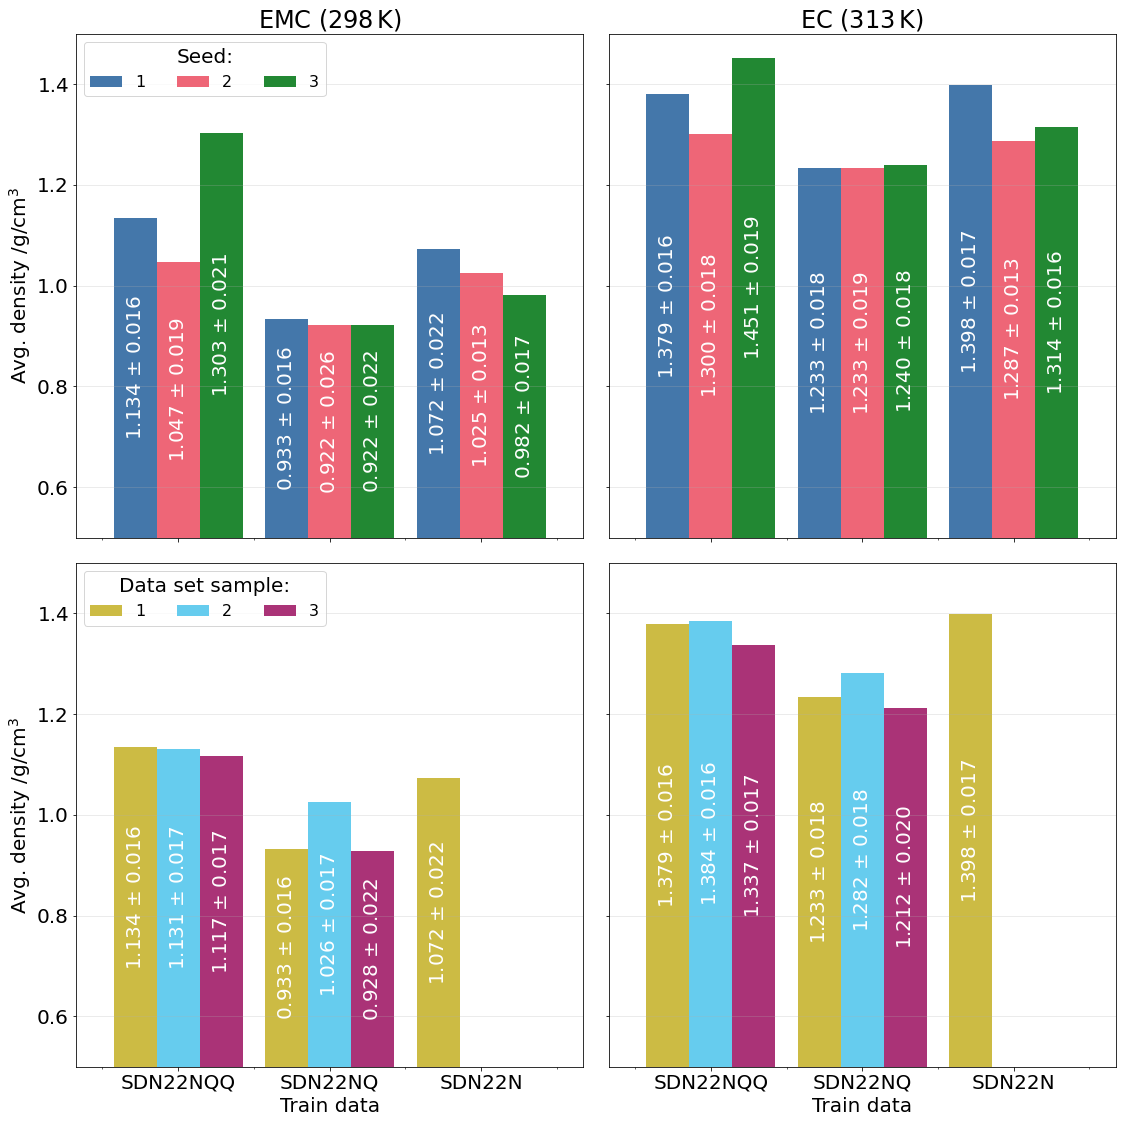

In [460]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = df['Composition'] == comps[0]
EC_mask = df['Composition'] == comps[-1]
EC_EMC_df = df[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    ).sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    ).sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize)

    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    ).sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    ).sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

axs[0,0].legend(title='Seed:', ncols=3, loc='upper left', fontsize=fsize-4)
axs[1,0].legend(title='Data set sample:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()

### Diffusivity

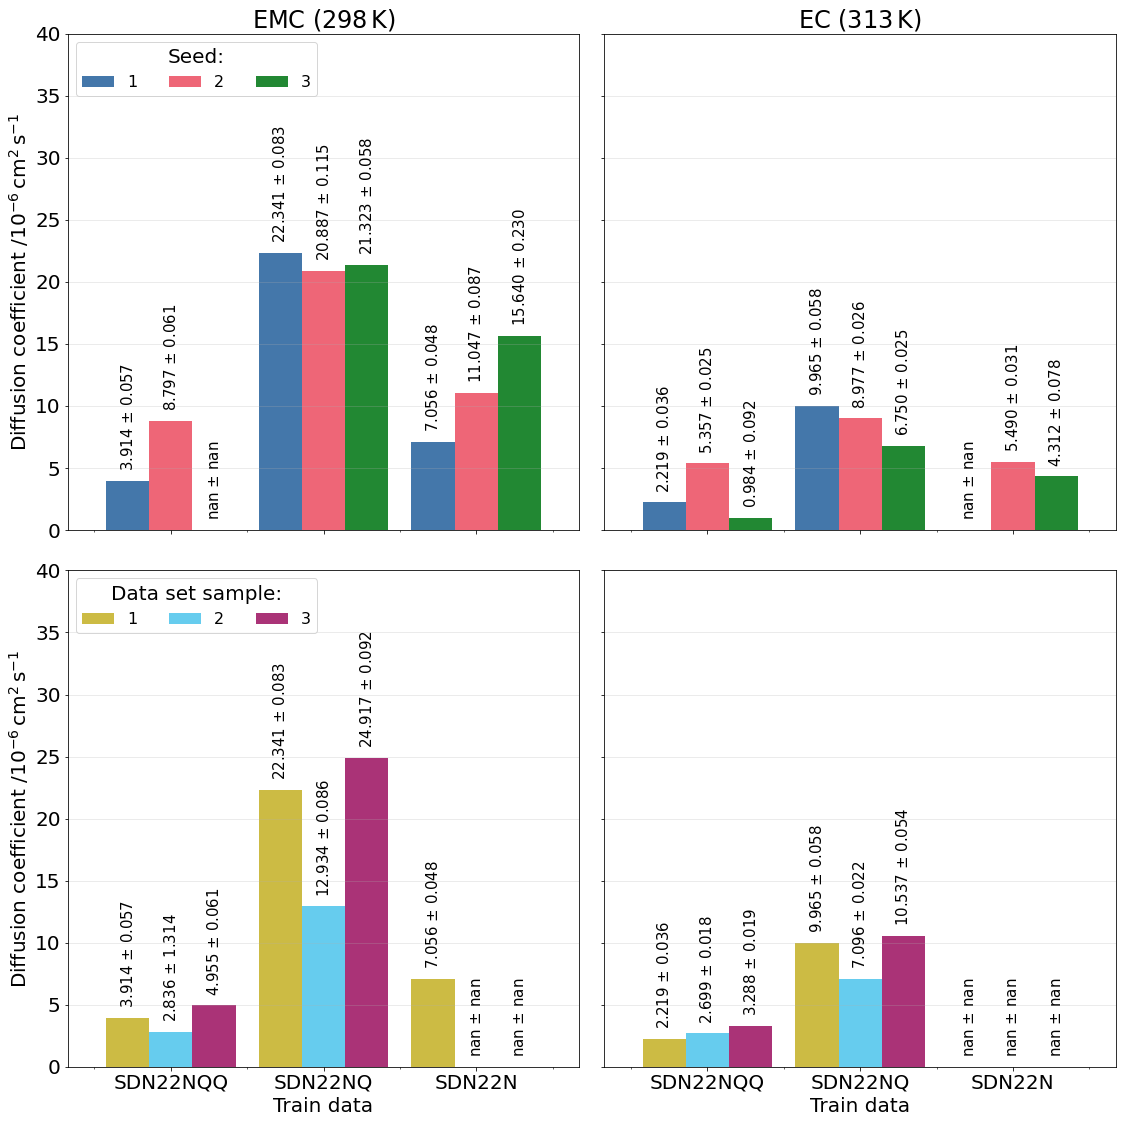

In [461]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = df['Composition'] == comps[0]
EC_mask = df['Composition'] == comps[-1]
EC_EMC_df = df[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=False)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,40],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=False)#[order]
    a1 = D_g.plot.bar(
        ylim=[0,40],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    #ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

axs[0,0].legend(title='Seed:', ncols=3, loc='upper left', fontsize=fsize-4)
axs[1,0].legend(title='Data set sample:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()

#### Committe average with the wB97X-D3BJ functional

In [505]:
def reduce_df(df, drop_list):
    df = df.drop(drop_list, axis=1)

    data = {}
    for i, (name, group) in enumerate(df.groupby('Composition')):
        #print(name)
        #print(group)
        dens = group['Avg. density'].mean()
        dens_err = (group['Std. density']**2).sum()**0.5/len(group)

        diff = group['Diffusion coefficient'].mean()
        diff_err = (group['Diff. fit error']**2).sum()**0.5/len(group)

        diff_start = group['Diff. start time /ns'].mean()
        tmp = {}
        for col in group.columns:
            
            try:
                if 'Train data' in col:
                    tmp[col] = group[col].iloc[0]
                elif 'Func' in col:
                    tmp[col] = group[col].iloc[0]
                elif 'Comp' in col:
                    tmp[col] = group[col].iloc[0]
                elif ('Std' in col) or ('error' in col):
                    tmp[col] = (group[col]**2).sum()**0.5/len(group)
                else:
                    tmp[col] = group[col].mean()
            except:
                pass

        data[i] = tmp
    dframe = pd.DataFrame.from_dict(data, orient='index')
    return dframe

In [506]:
drop_list = ['Seed', 'Sample', 'log-log r2', 'Diff. r2']
SD22NQ_wB97_df = reduce_df(df[df['Train data'] == 'SDN22NQ'], drop_list)
SD22NQ_wB97_df

,Train data,Functional,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,Diff. start time /ns
0,SDN22NQ,wB97X,"EC (313$\,$K)",1.239912,0.008359,8.665082,0.017986,0.220100
1,SDN22NQ,wB97X,"EC:EMC (3:7) (298$\,$K)",1.032804,0.009197,13.418679,0.538532,0.543210
2,SDN22NQ,wB97X,"EC:EMC (7:3) (298$\,$K)",1.130835,0.008155,9.834129,0.209453,0.389556
3,SDN22NQ,wB97X,"EMC (298$\,$K)",0.946189,0.009395,20.480476,0.039659,0.176034


# NPT dynamics, part B

In [511]:
tags = [
    'SDN22NQ/B97/SEED1/DSET1',
    'SDN22NQ/B97/SEED1/DSET2',
    'SDN22NQ/B97/SEED1/DSET3',
    #'SDN22NQ/B97/SEED2/DSET1', # this is missing, locally (Sams) only 100%EMC?
    #'SDN22NQ/B97/SEED3/DSET1', # this is missing, locally (Sams) only 100%EMC?
] # These tags needs to be adjusted to be compliant with zenodo

thermo = dict()
for tag in tags:
    thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

## Determining diffusion limit start times

In [512]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=1e-3, min_steps=5e3)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.001
59953 99997 0.971619045528815 7.688994264412281e-10 7.290124227350194e-12 0.9746333637602803
Using slope error thresold of: 0.001
76001 99999 0.9440579691765988 4.198650088045304e-10 7.736578652165192e-12 0.9443690316303099
Using slope error thresold of: 0.001
71737 99999 0.9354254977452798 4.0347956795823094e-10 7.967217891488773e-12 0.9262070849904299
Using slope error thresold of: 0.001
6704 99998 0.9847772414132672 4.0573411916103993e-10 1.886650639813047e-12 0.9856237529580553
Using slope error thresold of: 0.001
12673 99999 0.9942688656638068 3.264013362703706e-09 1.4045801510329567e-11 0.9884425103950719
Using slope error thresold of: 0.001
47125 99999 0.9874879285366459 2.183360825866184e-09 1.3774322060911519e-11 0.9850121887596335
Using slope error thresold of: 0.001
42274 99999 0.9890054397049161 1.7696839800929538e-09 8.985017296028987e-12 0.9893553666209816
Using slope error thresold of: 0.001
85913 99999 0.8828324692294776 1.6150119135

In [513]:
bf, dunit = get_density(tags, dynamics_path, std=True)
bf['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
#df['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]]
bf['Diff. fit error'] = [e*1e10 for e in diff_errs] # 1e-6 cm2/s
bf['log-log r2'] = log_r2
bf['Diff. r2'] = diff_r2
bf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
pd.to_pickle(bf, "./part3b_opt_cluster.pkl")

{'SDN22NQ/B97/SEED1/DSET1': {'npt_000conEC_298K': 1.040878980399412, 'npt_033conEC_298K': 1.1129425156551567, 'npt_066conEC_298K': 1.194697342603426, 'npt_100conEC_313K': 1.2804432001340025}, 'SDN22NQ/B97/SEED1/DSET2': {'npt_000conEC_298K': 0.8452666793367932, 'npt_033conEC_298K': 0.9194072432824328, 'npt_066conEC_298K': 1.0085624202442025, 'npt_100conEC_313K': 1.1141606496464966}, 'SDN22NQ/B97/SEED1/DSET3': {'npt_000conEC_298K': 0.8184571028810287, 'npt_033conEC_298K': 0.9056704198541985, 'npt_066conEC_298K': 0.9975745981859822, 'npt_100conEC_313K': 1.1184467494474946}}


In [514]:
try:
    bf = pd.read_pickle("./part3b_opt_cluster.pkl")
except:
    bf, dunit = get_density(tags, dynamics_path, std=True)
    bf['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
    #df['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]]
    bf['Diff. fit error'] = [e*1e10 for e in diff_errs] # 1e-6 cm2/s
    bf['log-log r2'] = log_r2
    bf['Diff. r2'] = diff_r2
    bf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
    pd.to_pickle(bf, "./part3b_opt_cluster.pkl")
bf.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

/tmp/ipykernel_159951/3767359376.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  bf.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])


,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQ,B97,1,1,"EMC (298$\,$K)",1.040879,0.015715,7.688994,0.072901,0.971619,0.974633,0.599540
1,SDN22NQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.112943,0.015171,4.198650,0.077366,0.944058,0.944369,0.760020
2,SDN22NQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.194697,0.014892,4.034796,0.079672,0.935425,0.926207,0.717380
3,SDN22NQ,B97,1,1,"EC (313$\,$K)",1.280443,0.018938,4.057341,0.018867,0.984777,0.985624,0.067040
4,SDN22NQ,B97,1,2,"EMC (298$\,$K)",0.845267,0.021027,32.640134,0.140458,0.994269,0.988443,0.126730
5,SDN22NQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",0.919407,0.020792,21.833608,0.137743,0.987488,0.985012,0.471250
6,SDN22NQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.008562,0.018139,17.696840,0.089850,0.989005,0.989355,0.422740
7,SDN22NQ,B97,1,2,"EC (313$\,$K)",1.114161,0.020028,16.150119,0.586051,0.882832,0.881770,0.859140
8,SDN22NQ,B97,1,3,"EMC (298$\,$K)",0.818457,0.024260,33.655569,6.392134,0.560565,0.562765,0.970170
9,SDN22NQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",0.905670,0.024174,28.565579,4.225987,0.517374,0.511707,0.939660


## Results
### Densities

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


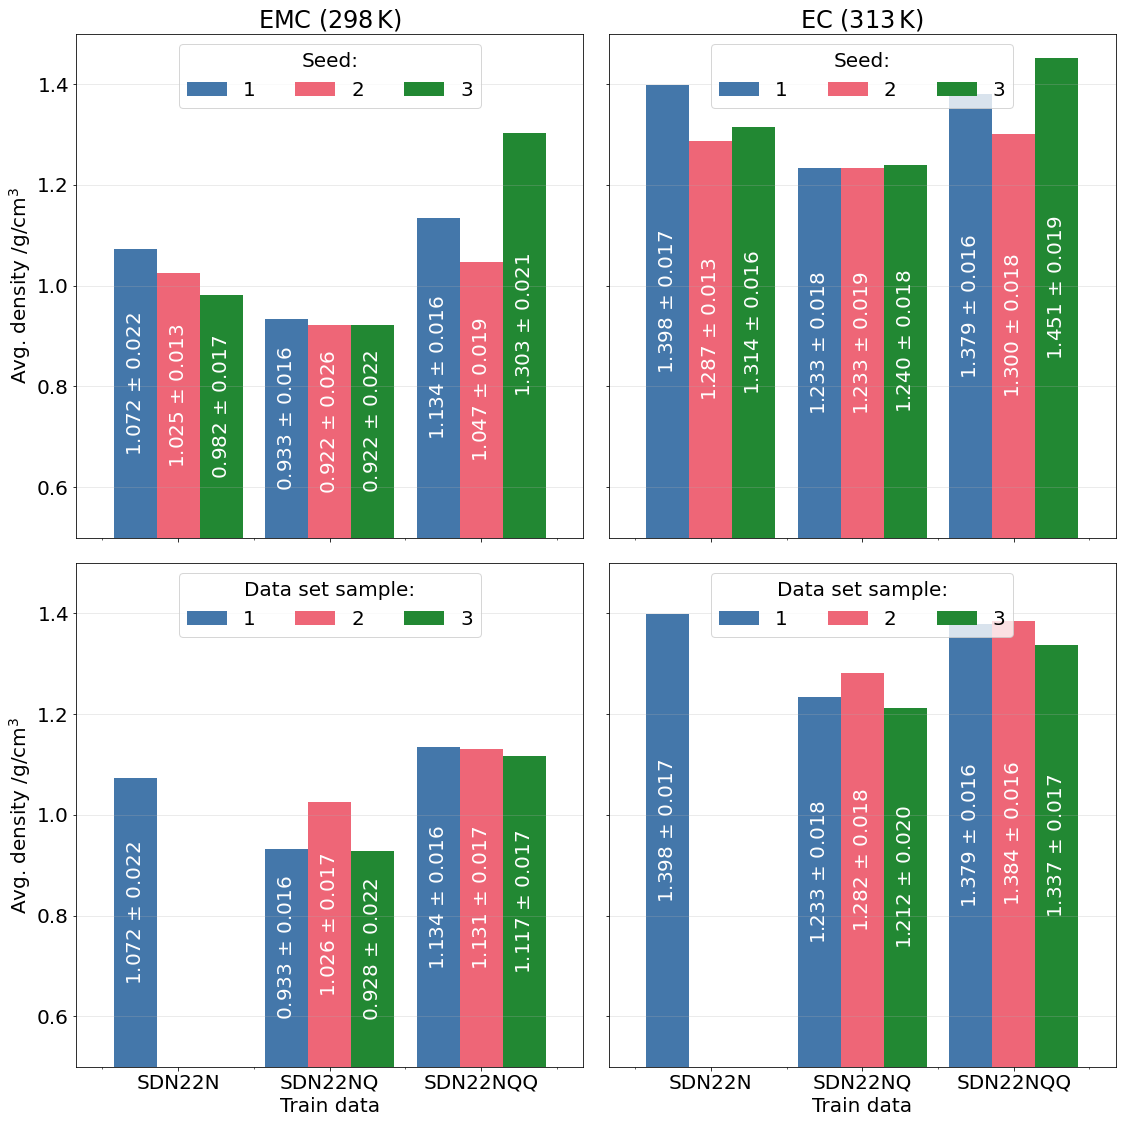

In [52]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = df['Composition'] == comps[0]
EC_mask = df['Composition'] == comps[-1]
EC_EMC_df = df[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize)

    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')

plt.tight_layout()

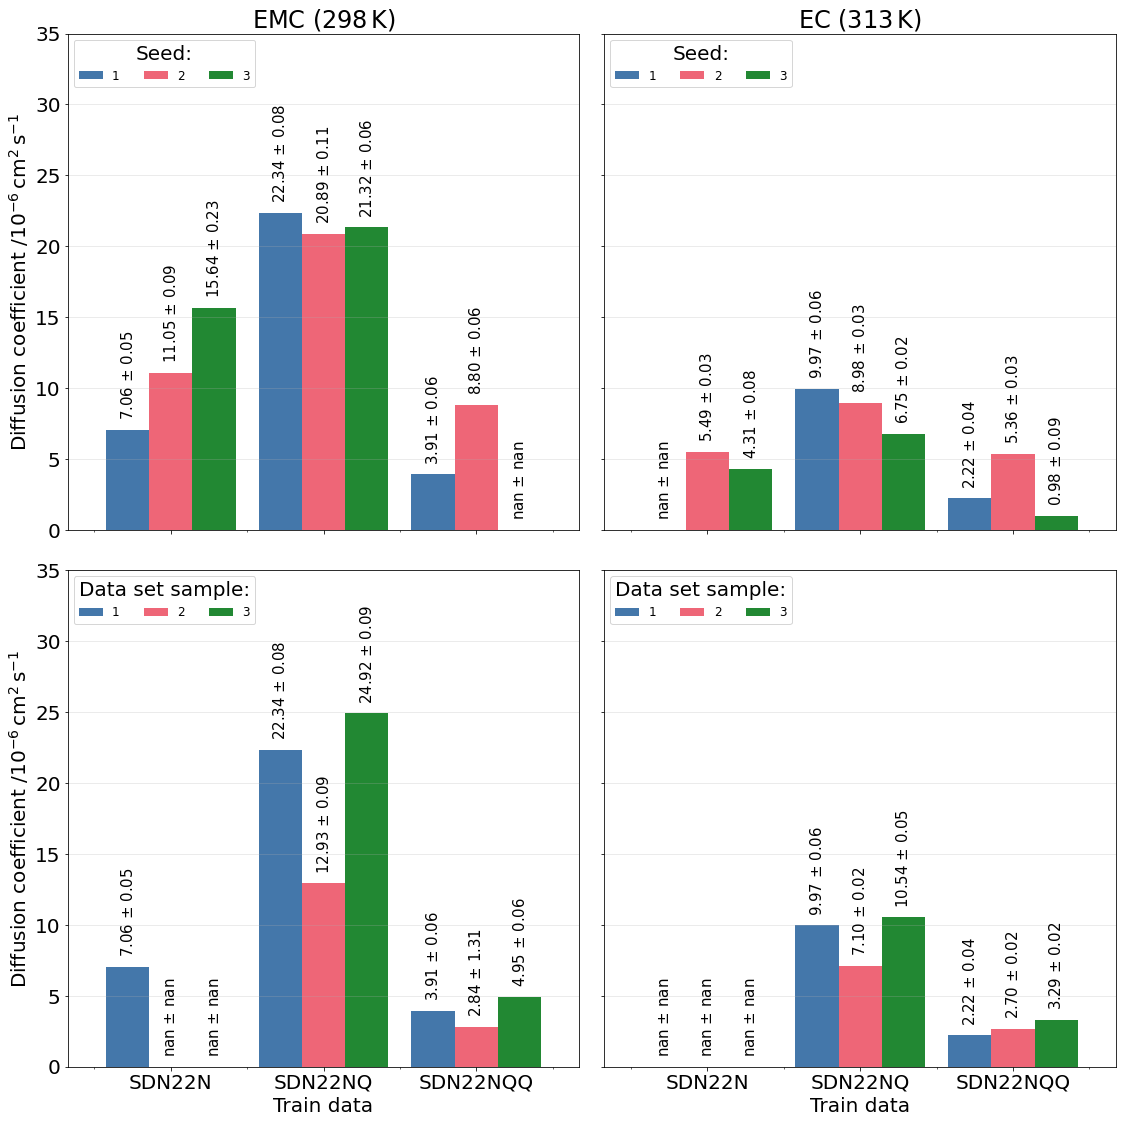

In [182]:
fsize = 20
plt.rcParams.update({'font.size': fsize})


comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]


fig, axs = plt.subplots(2,2, figsize=(8*2, 8*2), sharey='row', sharex='col')

EMC_mask = df['Composition'] == comps[0]
EC_mask = df['Composition'] == comps[-1]
EC_EMC_df = df[EC_mask | EMC_mask]

seed_df = EC_EMC_df[EC_EMC_df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,35],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper left', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.2f} $\\pm$ {e:.2f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

sample_df = EC_EMC_df[EC_EMC_df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = D_g.plot.bar(
        ylim=[0,35],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper left', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.2f} $\\pm$ {e:.2f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

plt.tight_layout()

#### Intermolecular radial distributions

In [212]:
import pickle

def get_mol_positions(atoms):
	positions = []
	mol_set = set(atoms.arrays['molID'])
	for ID in mol_set:
		mol = atoms[atoms.arrays['molID'] == ID]
		com = mol.get_center_of_mass()
		positions.append(com)
	positions = np.array(positions)
	return positions#, len(mol_set)

def mol_rdf(atoms, rmax, nbins, return_num_mols=False):
	positions = get_mol_positions(atoms)
	nmols, dim = positions.shape
	box_length = atoms.get_volume()**(1/3)
	for i, p in enumerate(positions):
		# PBC
		delta = positions[i+1:]-positions[i]
		delta -= box_length*np.round(delta/box_length)
		
		# Get counts
		dists = np.linalg.norm(delta, axis=1)
		s = sorted(dists[dists <= rmax])[1:]
		if i == 0:
			counts, bins = np.histogram(s, nbins, (0,rmax))
		else:
			counts += np.histogram(s, nbins, (0,rmax))[0]

	if return_num_mols:
		return counts, bins, nmols
	else:
		return counts, bins

def compute_rdf(traj, rmax=None, nbins=100, return_rho=False):
	for i, atoms in enumerate(traj):
		if i == 0:
			counts, bins, nmols = mol_rdf(atoms, rmax=rmax, nbins=nbins, return_num_mols=True)
			volume = atoms.get_volume()
			box_length = volume**(1/3)
			r = 0.5*(bins[1:]+bins[:-1])
		else:
			counts += mol_rdf(atoms, rmax=rmax, nbins=nbins)[0]
	
	num_snapshots = i+1
	nvalid = nmols/2
	n_k = counts/(nvalid*num_snapshots)	
	dr = rmax/nbins
	shell_volumes = 4/3*np.pi*((r+dr)**3-r**3)
	rho = nmols/volume
	
	g = n_k/(rho*shell_volumes)
	if return_rho:
		return g, r, rho
	else:
		return g, r

def get_indices_of_sign_change(lst):
    arr = np.array(lst)
    sign_changes = np.where(np.diff(np.sign(arr)) != 0)[0]
    #sign_changes = sign_changes[sign_changes>55] # The limit was taken from observation
    return sign_changes

In [358]:
def eval_rdfs(tags, traj_path, slice=':'):
    rdfs = {}
    number_densities = {}
    for tag in tags:
        data_set, functional, seed, dset_sample = tag.split('/')
        flist = [name for name in glob.glob(f'{traj_path}{tag}/*') if '.xyz' in name]
        name = f'{data_set}_{functional}'
        print(name, dset_sample, seed)

        for file in flist:
            print(file)
            comp = file.split('/')[-1].split('.')[0][4:-5]
            comp = conmap[comp]
            traj = read(file, slice)
            aa.find_molecs(traj, fct=1.0)
            g, r, rho = compute_rdf(traj, rmax=11, return_rho=True)

            if name not in rdfs:
                rdfs[name] = {}
            if dset_sample not in rdfs[name]:
                rdfs[name][dset_sample] = {}
            if seed not in rdfs[name][dset_sample]:
                rdfs[name][dset_sample][seed] = {}
            
            if name not in number_densities:
                number_densities[name] = {}
            if dset_sample not in number_densities[name]:
                number_densities[name][dset_sample] = {}
            if seed not in number_densities[name][dset_sample]:
                number_densities[name][dset_sample][seed] = {}

            rdfs[name][dset_sample][seed][comp] = [g, r]
            number_densities[name][dset_sample][seed][comp] = rho
            del traj
    
    return rdfs, number_densities

test

In [359]:
trdfs, tnumber_densities = eval_rdfs(tags, dynamics_path, ':2')

SDN22NQQ_wB97X DSET1 SEED1
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_000conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_033conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_066conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_100conEC_313K.xyz
SDN22NQQ_wB97X DSET2 SEED1
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_000conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_033conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_066conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_100conEC_313K.xyz
SDN22NQQ_wB97X DSET3 SEED1
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_000conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_033conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_066conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_100conEC_313K.xyz
SDN22NQQ_wB97X DSET1 SEED2
../publication/d

test

,Train data,Functional,Seed,Sample,Composition,Rmin
0,SDN22NQQ,wB97X,SEED1,DSET1,"EMC (298$\,$K)",6.105
1,SDN22NQQ,wB97X,SEED1,DSET1,"EC:EMC (3:7) (298$\,$K)",6.105
2,SDN22NQQ,wB97X,SEED1,DSET1,"EC:EMC (7:3) (298$\,$K)",6.105
3,SDN22NQQ,wB97X,SEED1,DSET1,"EC (313$\,$K)",6.105
4,SDN22NQQ,wB97X,SEED2,DSET1,"EMC (298$\,$K)",6.105
5,SDN22NQQ,wB97X,SEED2,DSET1,"EC:EMC (3:7) (298$\,$K)",6.105
6,SDN22NQQ,wB97X,SEED2,DSET1,"EC:EMC (7:3) (298$\,$K)",6.105
7,SDN22NQQ,wB97X,SEED2,DSET1,"EC (313$\,$K)",6.105
8,SDN22NQQ,wB97X,SEED3,DSET1,"EMC (298$\,$K)",6.105
9,SDN22NQQ,wB97X,SEED3,DSET1,"EC:EMC (3:7) (298$\,$K)",6.105


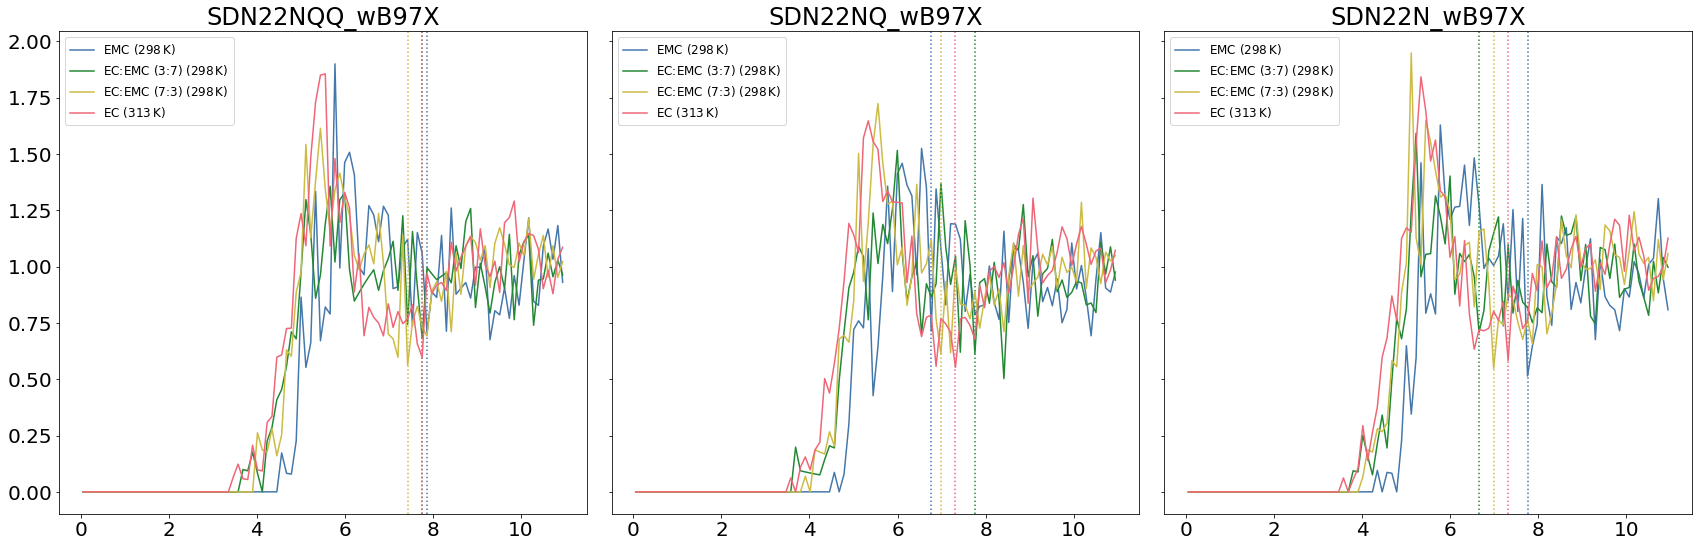

In [433]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, trdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        for seed,comps in seeds.items():
            #print(seed)
            for comp, (g, r) in comps.items():
                #print(comp)
                id0 = np.where(r>rstart)[0][0]
                #print(id0, r[id0])
                
                idhi = id0+id_width
                rmin = min(r[id0:idhi])
                idx = np.argmin(g[id0:idhi])
                #print(idx, r[idx])

                if (dset == 'DSET1') and (seed == 'SEED1'):
                    ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                    #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                    ax.plot(r, g, label=comp, color=get_colour(comp))
                    ax.legend(fontsize=fsize-8)

                train_data, functional = model.split('_')
                radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()


radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df


The below cell takes around 16 hrs to run.

In [ ]:
rdfs, number_densities = eval_rdfs(tags, dynamics_path)

with open('./part3a_rdfs.pkl', 'wb') as f:
    pickle.dump(rdfs, f)

with open('./part3a_rhos.pkl', 'wb') as f:
    pickle.dump(number_densities, f)

In [ ]:
with open('./part3a_rdfs.pkl', 'rb') as f:
    rdfs = pickle.load(f)

with open('./part3a_rhos.pkl', 'rb') as f:
    number_densities = pickle.load(f)

Data set 1

In [ ]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, rdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        if dset == 'DSET1':
            for seed,comps in seeds.items():
                if seed == 'SEED1':
                    #print(seed)
                    for comp, (g, r) in comps.items():
                        #print(comp)
                        id0 = np.where(r>rstart)[0][0]
                        #print(id0, r[id0])
                        
                        idhi = id0+id_width
                        rmin = min(r[id0:idhi])
                        idx = np.argmin(g[id0:idhi])
                        #print(idx, r[idx])

                        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                        ax.plot(r, g, label=comp, color=get_colour(comp))
                        ax.legend(fontsize=fsize-8)
                        
                        train_data, functional = model.split('_')
                        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

Data set 2

In [ ]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, rdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        if dset == 'DSET2':
            for seed,comps in seeds.items():
                if seed == 'SEED1':
                    #print(seed)
                    for comp, (g, r) in comps.items():
                        #print(comp)
                        id0 = np.where(r>rstart)[0][0]
                        #print(id0, r[id0])
                        
                        idhi = id0+id_width
                        rmin = min(r[id0:idhi])
                        idx = np.argmin(g[id0:idhi])
                        #print(idx, r[idx])

                        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                        ax.plot(r, g, label=comp, color=get_colour(comp))
                        ax.legend(fontsize=fsize-8)

                        train_data, functional = model.split('_')
                        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

Data set 3

In [ ]:
plt.rcParams.update({'font.size': fsize})


rstart = 6
id_width = 20

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,dsets) in zip(axs, rdfs.items()):
    ax.set_title(model)
    #print(model)
    for dset,seeds in dsets.items():
        #print(dset)
        if dset == 'DSET3':
            for seed,comps in seeds.items():
                if seed == 'SEED1':
                    #print(seed)
                    for comp, (g, r) in comps.items():
                        #print(comp)
                        id0 = np.where(r>rstart)[0][0]
                        #print(id0, r[id0])
                        
                        idhi = id0+id_width
                        rmin = min(r[id0:idhi])
                        idx = np.argmin(g[id0:idhi])
                        #print(idx, r[idx])

                        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
                        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
                        ax.plot(r, g, label=comp, color=get_colour(comp))
                        ax.legend(fontsize=fsize-8)

                        train_data, functional = model.split('_')
                        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

The cells below should be replaced by the cells above here.

In [ ]:
rdfs = {}
number_densities = {}
for tag in tags:
    data_set, functional, seed, dset_sample = tag.split('/')
    flist = [name for name in glob.glob(f'{dynamics_path}{tag}/*') if '.xyz' in name]
    print(f'{data_set}_{functional}')
    rdfs[f'{data_set}_{functional}'] = {}
    number_densities[f'{data_set}_{functional}'] = {}
    for file in flist:
        print(file)
        comp = file.split('/')[-1].split('.')[0][4:-5]
        comp = conmap[comp]
        traj = read(file, ':')
        aa.find_molecs(traj, fct=1.0)
        g, r, rho = compute_rdf(traj, rmax=11, return_rho=True)
        rdfs[f'{data_set}_{functional}'][comp] = [g, r]
        number_densities[f'{data_set}_{functional}'][comp] = rho
        del traj

with open('./part3a_rdfs.pkl', 'wb') as f:
    pickle.dump(rdfs, f)

with open('./part3a_rhos.pkl', 'wb') as f:
    pickle.dump(number_densities, f)

SDN22NQQ_wB97X
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_000conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_033conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_066conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET1/npt_100conEC_313K.xyz
SDN22NQQ_wB97X
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_000conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_033conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_066conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET2/npt_100conEC_313K.xyz
SDN22NQQ_wB97X
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_000conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_033conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_066conEC_298K.xyz
../publication/dynamics/SDN22NQQ/wB97X/SEED1/DSET3/npt_100conEC_313K.xyz
SDN22NQQ_wB97X
../publication/dynamics/SDN22NQQ/wB97X/SEED2/DSET1/npt_000conEC_

In [367]:
with open('./part3a_rdfs.pkl', 'rb') as f:
    rdfs = pickle.load(f)

with open('./part3a_rhos.pkl', 'rb') as f:
    number_densities = pickle.load(f)

In [222]:
for ax, (model,comps) in zip(axs,rdfs.items()):
    print(model)
    print(comps.keys())

SDN22NQQ_wB97X
dict_keys(['EMC (298$\\,$K)', 'EC:EMC (3:7) (298$\\,$K)', 'EC:EMC (7:3) (298$\\,$K)', 'EC (313$\\,$K)'])
SDN22NQ_wB97X
dict_keys(['EMC (298$\\,$K)', 'EC:EMC (3:7) (298$\\,$K)', 'EC:EMC (7:3) (298$\\,$K)', 'EC (313$\\,$K)'])
SDN22N_wB97X
dict_keys(['EMC (298$\\,$K)', 'EC:EMC (3:7) (298$\\,$K)', 'EC:EMC (7:3) (298$\\,$K)', 'EC (313$\\,$K)'])


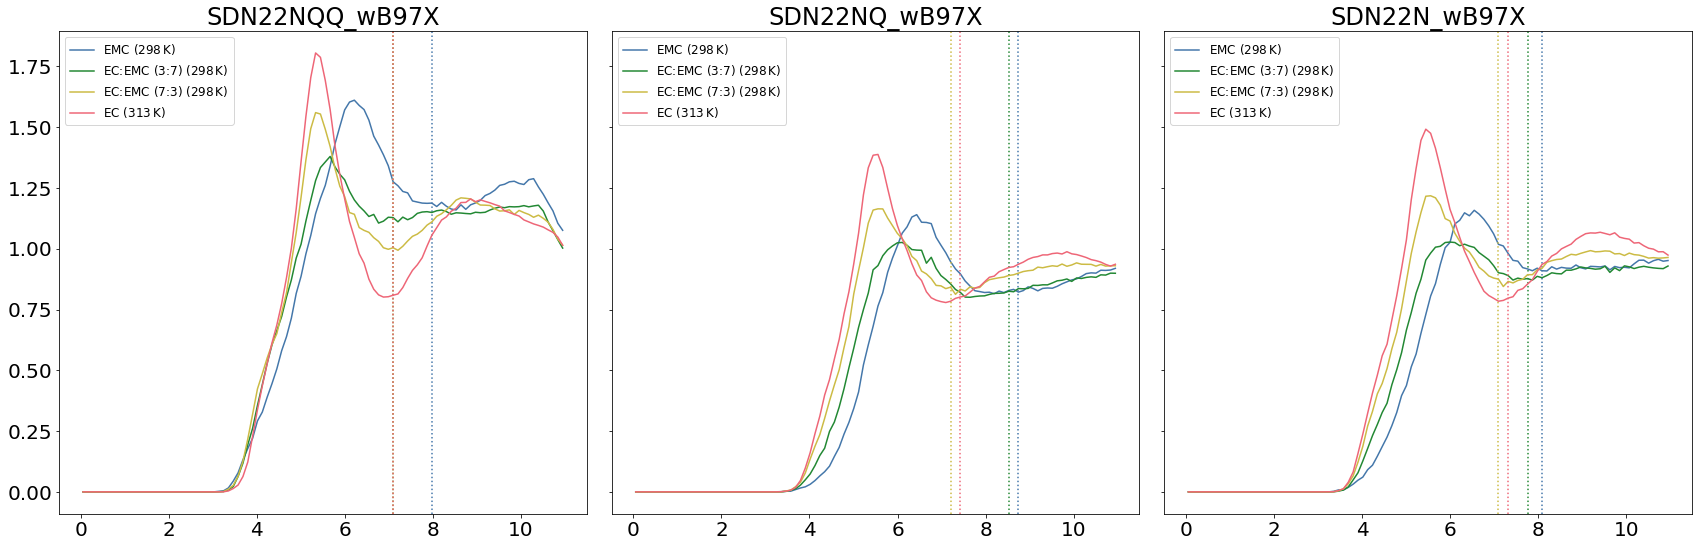

In [218]:
plt.rcParams.update({'font.size': fsize})


rlim = 6.7
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,comps) in zip(axs,rdfs.items()):
    ax.set_title(model)
    for comp, (g, r) in comps.items():
        id0 = np.where(r>rlim)[0][0]
        dgdr = np.diff(g[r>rlim]/r[r>rlim])
        indices = get_indices_of_sign_change(dgdr)
        idx = id0+indices[0]
        ax.axvline(r[idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
        ax.plot(r, g, label=comp, color=get_colour(comp))
        ax.legend(fontsize=fsize-8)

plt.tight_layout()

,Train data,Functional,Seed,Sample,Composition,Rmin
0,SDN22NQQ,wB97X,SEED3,DSET1,"EMC (298$\,$K)",8.525
1,SDN22NQQ,wB97X,SEED3,DSET1,"EC:EMC (3:7) (298$\,$K)",6.765
2,SDN22NQQ,wB97X,SEED3,DSET1,"EC:EMC (7:3) (298$\,$K)",7.205
3,SDN22NQQ,wB97X,SEED3,DSET1,"EC (313$\,$K)",6.875
4,SDN22NQ,wB97X,SEED3,DSET1,"EMC (298$\,$K)",8.195
5,SDN22NQ,wB97X,SEED3,DSET1,"EC:EMC (3:7) (298$\,$K)",7.645
6,SDN22NQ,wB97X,SEED3,DSET1,"EC:EMC (7:3) (298$\,$K)",7.315
7,SDN22NQ,wB97X,SEED3,DSET1,"EC (313$\,$K)",7.095
8,SDN22N,wB97X,SEED3,DSET1,"EMC (298$\,$K)",8.195
9,SDN22N,wB97X,SEED3,DSET1,"EC:EMC (3:7) (298$\,$K)",7.865


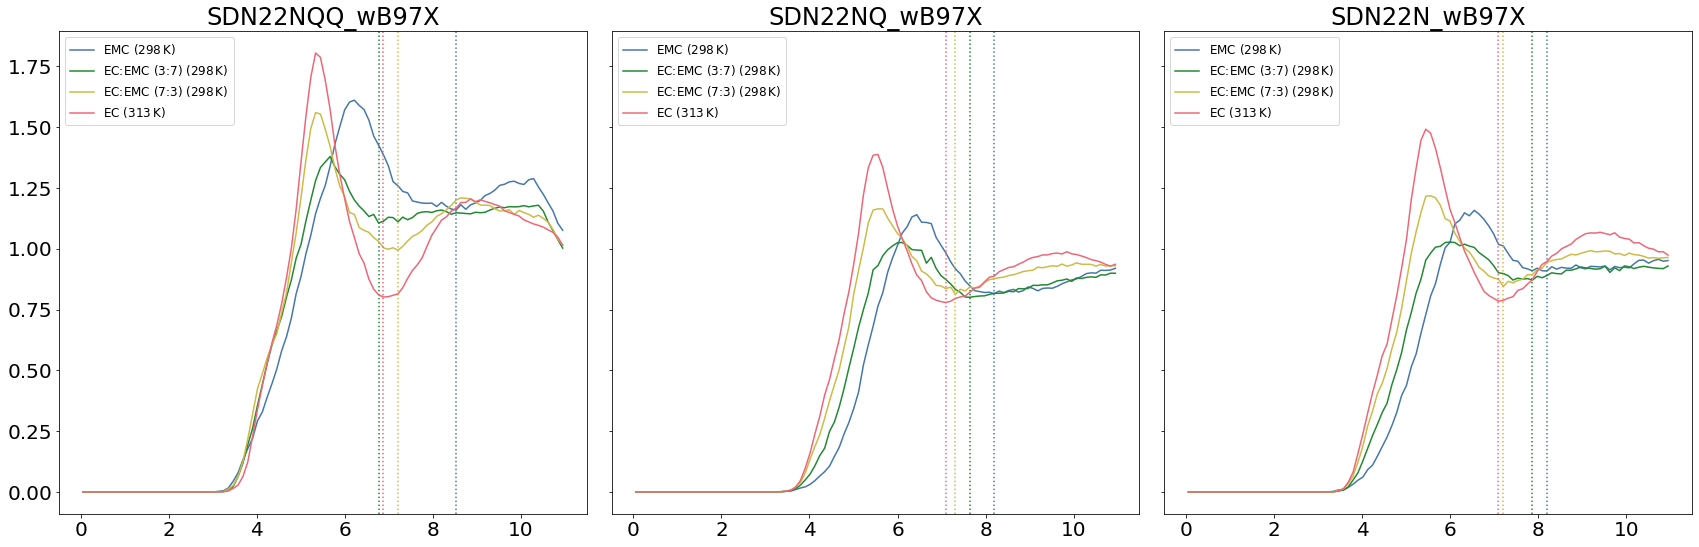

In [ ]:
plt.rcParams.update({'font.size': fsize})

rstart = 6.5
id_width = 30

radii = []
fig, axs = plt.subplots(1,3, figsize=(3*8,1*8), sharey=True)
for ax, (model,comps) in zip(axs,rdfs.items()):
    ax.set_title(model)
    for comp, (g, r) in comps.items():
        id0 = np.where(r>rstart)[0][0]
        #print(id0, r[id0])
        
        idhi = id0+id_width
        idx = np.argmin(g[id0:idhi])
        rmin = r[id0+idx]

        #print(idx, r[idx])

        ax.axvline(r[id0+idx], 0, 1, color=get_colour(comp), alpha=1, linestyle='dotted')
        #ax.axvspan(r[id0], r[idhi],alpha=0.05, color='gray')
        
        ax.plot(r, g, label=comp, color=get_colour(comp))
        ax.legend(fontsize=fsize-8)

        train_data, functional = model.split('_')
        radii.append([train_data, functional, seed, dset, comp, rmin])
plt.tight_layout()

radii_df = pd.DataFrame(radii, columns=['Train data', 'Functional', 'Seed', 'Sample', 'Composition', 'Rmin'])
radii_df

#### Committe average with the B97-D3BJ functional

In [60]:
def reduce_df(df, drop_list):
    df = df.drop(drop_list, axis=1)
    func = df['Functional'].iloc[0]
    data = {}
    for i, (name, group) in enumerate(df.groupby('Composition')):
        dens = group['Avg. density'].mean()
        dens_err = (group['Std. density']**2).sum()**0.5/len(group)

        diff = group['Diffusion coefficient'].mean()
        diff_err = (group['Diff. fit error']**2).sum()**0.5/len(group)

        diff_start = group['Diff. start time /ns'].mean()
        tmp = {'Composition':name, 'Functional':func}
        for col in group.columns:
            try:
                if ('Std' in col) or ('error' in col):
                    tmp[col] = (group[col]**2).sum()**0.5/len(group)
                else:
                    tmp[col] = group[col].mean()
            except:
                pass
        data[i] = tmp
    dframe = pd.DataFrame.from_dict(data, orient='index')
    return dframe

In [515]:
drop_list = ['Seed', 'Sample', 'log-log r2', 'Diff. r2']
SD22NQ_B97_df = reduce_df(bf[bf['Train data'] == 'SDN22NQ'], drop_list)
SD22NQ_B97_df

,Train data,Functional,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,Diff. start time /ns
0,SDN22NQ,B97,"EC (313$\,$K)",1.171017,0.011830,11.807226,0.197961,0.437193
1,SDN22NQ,B97,"EC:EMC (3:7) (298$\,$K)",0.979340,0.011770,18.199279,1.409646,0.723643
2,SDN22NQ,B97,"EC:EMC (7:3) (298$\,$K)",1.066945,0.010709,13.965346,0.088431,0.554130
3,SDN22NQ,B97,"EMC (298$\,$K)",0.901534,0.011915,24.661566,2.131364,0.565480


## Latex tables for paper

In [476]:
def seed_density(df, composition,train_data):
    comp_mask = df['Composition'] == composition
    train_mask = df['Train data'] == train_data
    selection = df[comp_mask & train_mask]
    deviation = abs(selection['Avg. density'].min()-selection['Avg. density'].max())
    return deviation


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    'Seed pair':['SD22N', 'SD22NQ', 'SD22NQQ'],
}

for config in configs:
    SD22N_deviation = seed_density(bdf, config, 'SDN22N')
    SD22NQ_deviation = seed_density(bdf, config, 'SDN22NQ')
    SD22NQQ_deviation = seed_density(bdf, config, 'SDN22NQQ')
    data[config] = [
        SD22N_deviation,
        SD22NQ_deviation,
        SD22NQQ_deviation,
    ]
    print(f'SD22N deviations: {SD22N_deviation:.4f} g/mL')
    print(f'SD22NQ deviations: {SD22NQ_deviation:.4f} g/mL')
    print(f'SD22NQQ deviations: {SD22NQQ_deviation:.4f} g/mL\n')

seed_dens_df = pd.DataFrame(data).round(decimals=3)
print(seed_dens_df.to_latex(index=False))

SD22N deviations: 0.0908 g/mL
SD22NQ deviations: 0.1042 g/mL
SD22NQQ deviations: 0.2564 g/mL

SD22N deviations: 0.0945 g/mL
SD22NQ deviations: 0.0913 g/mL
SD22NQQ deviations: 0.2350 g/mL

SD22N deviations: 0.0913 g/mL
SD22NQ deviations: 0.0826 g/mL
SD22NQQ deviations: 0.1975 g/mL

SD22N deviations: 0.1102 g/mL
SD22NQ deviations: 0.0703 g/mL
SD22NQQ deviations: 0.1509 g/mL

\begin{tabular}{lrrrr}
\toprule
Seed pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
SD22N & 0.091000 & 0.095000 & 0.091000 & 0.110000 \\
SD22NQ & 0.104000 & 0.091000 & 0.083000 & 0.070000 \\
SD22NQQ & 0.256000 & 0.235000 & 0.198000 & 0.151000 \\
\bottomrule
\end{tabular}



In [477]:
def sample_density(df, composition,train_data):
    comp_mask = df['Composition'] == composition
    sample_mask = df['Seed'] == 1
    train_mask = df['Train data'] == train_data
    selection = df[comp_mask & train_mask]
    deviation = abs(selection['Avg. density'].min()-selection['Avg. density'].max())
    return deviation


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    #'Seed pair':['SD22NQ', 'SD22NQQ'],
    'Seed pair':['SD22NQ'],
}

for config in configs:
    #SD22N_deviation = seed_density(sample_df, config, 'SDN22N')
    SD22NQ_deviation = sample_density(bdf, config, 'SDN22NQ')
    SD22NQQ_deviation = sample_density(bdf, config, 'SDN22NQQ')
    data[config] = [
        #SD22N_deviation,
        SD22NQ_deviation,
        #SD22NQQ_deviation,
    ]
    print(config)
    #print(f'SD22N deviations: {SD22N_deviation:.4f} g/mL')
    print(f'SD22NQ deviations: {SD22NQ_deviation:.4f} g/mL')
    #print(f'SD22NQQ deviations: {SD22NQQ_deviation:.4f} g/mL\n')

seed_dens_df = pd.DataFrame(data).round(decimals=3)
#diff_df['Avg. error'] = diff_df.sum(axis=1, numeric_only=True)/len(diff_df.columns)
print(seed_dens_df.to_latex(index=False))

EMC (298$\,$K)
SD22NQ deviations: 0.1042 g/mL
EC:EMC (3:7) (298$\,$K)
SD22NQ deviations: 0.0913 g/mL
EC:EMC (7:3) (298$\,$K)
SD22NQ deviations: 0.0826 g/mL
EC (313$\,$K)
SD22NQ deviations: 0.0703 g/mL
\begin{tabular}{lrrrr}
\toprule
Seed pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
SD22NQ & 0.104000 & 0.091000 & 0.083000 & 0.070000 \\
\bottomrule
\end{tabular}



# NPT dynamics, part C

In [508]:
cf = pd.concat([SD22NQ_B97_df, SD22NQ_wB97_df])
cf

,Train data,Functional,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,Diff. start time /ns
0,SDN22NQ,B97,"EC (313$\,$K)",1.171017,0.011830,11.807226,0.197961,0.437193
1,SDN22NQ,B97,"EC:EMC (3:7) (298$\,$K)",0.979340,0.011770,18.199279,1.409646,0.723643
2,SDN22NQ,B97,"EC:EMC (7:3) (298$\,$K)",1.066945,0.010709,13.965346,0.088431,0.554130
3,SDN22NQ,B97,"EMC (298$\,$K)",0.901534,0.011915,24.661566,2.131364,0.565480
0,SDN22NQ,wB97X,"EC (313$\,$K)",1.239912,0.008359,8.665082,0.017986,0.220100
1,SDN22NQ,wB97X,"EC:EMC (3:7) (298$\,$K)",1.032804,0.009197,13.418679,0.538532,0.543210
2,SDN22NQ,wB97X,"EC:EMC (7:3) (298$\,$K)",1.130835,0.008155,9.834129,0.209453,0.389556
3,SDN22NQ,wB97X,"EMC (298$\,$K)",0.946189,0.009395,20.480476,0.039659,0.176034


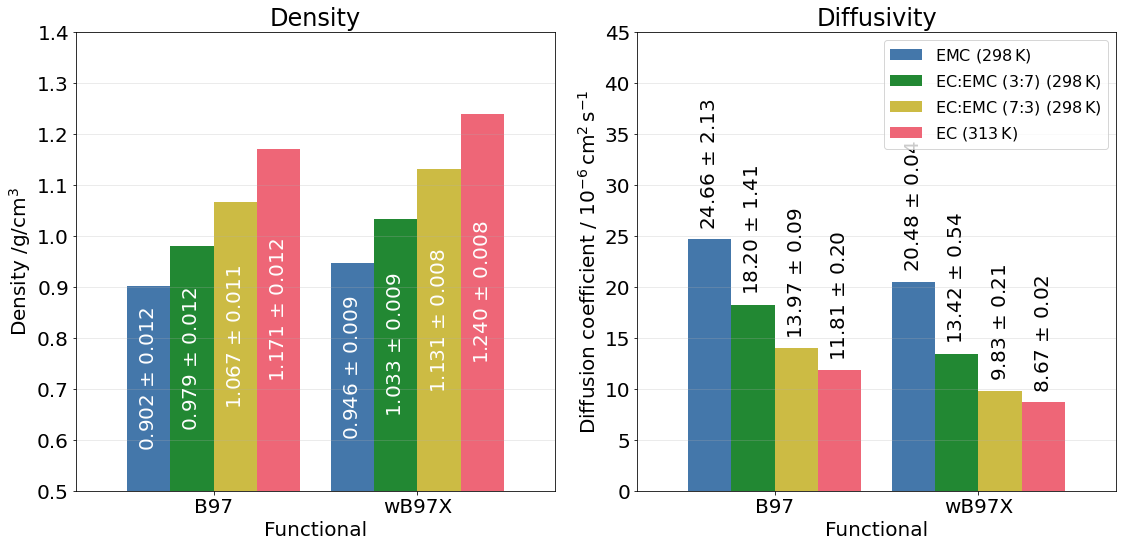

In [509]:
order = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

# Pivot tables for plotting
dens_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Avg. density',
).sort_index(axis=0,ascending=True)[order]
dens_err_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Std. density',
).sort_index(axis=0,ascending=True)[order]

diff_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Diffusion coefficient',
).sort_index(axis=0,ascending=True)[order]
diff_err_df = cf.pivot(
	index='Functional',
	columns='Composition',
	values='Diff. fit error',
).sort_index(axis=0,ascending=True)[order]

fig, axs = plt.subplots(1,2, figsize=(8*2, 8*1), sharex=True, sharey=False)

a0 = dens_df.plot.bar(
    title='Density',
    ylim=[0.5,1.4],
    ylabel=f'Density /{dunit}',
    rot=0,
    width=0.85,
    color=[get_colour(o) for o in order],
    ax=axs[0],
    legend=False,
)
axs[0].grid(axis='y', alpha=0.3)
for i, c in enumerate(a0.containers):
    col_name = dens_df.columns[i]
    dens_vals = dens_df[col_name]
    dens_errors = dens_err_df[col_name]
    dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errors)]
    axs[0].bar_label(c, rotation=90, fontsize=fsize, label_type='center', padding=10, labels=dens_labels, color='white')


a1 = diff_df.plot.bar(
    title='Diffusivity',
    ylim=[0,45],
    ylabel=f'Diffusion coefficient / $10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
    rot=0,
    width=0.85,
    color=[get_colour(o) for o in order],
    ax=axs[1],
    legend=False,
)
axs[1].grid(axis='y', alpha=0.3)
axs[1].legend(loc='upper right', fontsize=fsize-4)
for i, c in enumerate(a1.containers):
    col_name = dens_df.columns[i]
    diff_vals = diff_df[col_name]
    diff_errors = diff_err_df[col_name]
    diff_labels = [f'{v:.2f} $\\pm$ {e:.2f}' for v, e in zip(diff_vals, diff_errors)]
    axs[1].bar_label(c, rotation=90, fontsize=fsize, label_type='edge', padding=10, labels=diff_labels, color='black')

plt.tight_layout()

## Latex tables for paper

In [71]:
bf

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQ,B97,1,1,"EMC (298$\,$K)",1.040879,0.015715,7.688994,0.072901,0.971619,0.974633,0.59954
1,SDN22NQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.112943,0.015171,4.198650,0.077366,0.944058,0.944369,0.76002
2,SDN22NQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.194697,0.014892,4.034796,0.079672,0.935425,0.926207,0.71738
3,SDN22NQ,B97,1,1,"EC (313$\,$K)",1.280443,0.018938,4.057341,0.018867,0.984777,0.985624,0.06704
4,SDN22NQ,B97,1,2,"EMC (298$\,$K)",0.845267,0.021027,32.640134,0.140458,0.994269,0.988443,0.12673
5,SDN22NQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",0.919407,0.020792,21.833608,0.137743,0.987488,0.985012,0.47125
6,SDN22NQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.008562,0.018139,17.696840,0.089850,0.989005,0.989355,0.42274
7,SDN22NQ,B97,1,2,"EC (313$\,$K)",1.114161,0.020028,16.150119,0.586051,0.882832,0.881770,0.85914
8,SDN22NQ,B97,1,3,"EMC (298$\,$K)",0.818457,0.024260,33.655569,6.392134,0.560565,0.562765,0.97017
9,SDN22NQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",0.905670,0.024174,28.565579,4.225987,0.517374,0.511707,0.93966


In [72]:
def functional_density(df, functional, composition):
    comp_mask = df['Composition'] == composition
    func_mask = df['Functional'] == functional
    selection = df[comp_mask & func_mask]['Avg. density']
    #return round(selection.iloc[0], precision)
    return selection.iloc[0]


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    'Functional pair':['\BNS and \wBNS'],
}

for config in configs:
    B97_dens = functional_density(cf, 'B97', config)
    wB97_dens = functional_density(cf, 'wB97X', config)
    data[config] = [abs(B97_dens-wB97_dens)]
    print(config)
    print(f'PBED3-B97D3 diff.: {abs(B97_dens-wB97_dens):.4f} g/mL\n')

dens_df = pd.DataFrame(data).round(decimals=3)
print(dens_df.to_latex(index=False))

EMC (298$\,$K)
PBED3-B97D3 diff.: 0.1402 g/mL

EC:EMC (3:7) (298$\,$K)
PBED3-B97D3 diff.: 0.1405 g/mL

EC:EMC (7:3) (298$\,$K)
PBED3-B97D3 diff.: 0.1425 g/mL

EC (313$\,$K)
PBED3-B97D3 diff.: 0.1406 g/mL

\begin{tabular}{lrrrr}
\toprule
Functional pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
\BNS and \wBNS & 0.140000 & 0.140000 & 0.143000 & 0.141000 \\
\bottomrule
\end{tabular}



In [73]:
def functional_diffusivity(df, functional, composition):
    comp_mask = df['Composition'] == composition
    func_mask = df['Functional'] == functional
    selection = df[comp_mask & func_mask]['Diffusion coefficient']
    return selection.iloc[0]


configs = [
    'EMC (298$\,$K)',
    'EC:EMC (3:7) (298$\,$K)', 
    'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

data = {
    'Functional pair':['\BNS and \wBNS'],
}

for config in configs:
    B97_diff = functional_diffusivity(cf, 'B97', config)
    wB97_diff = functional_diffusivity(cf, 'wB97X', config)
    data[config] = [abs(B97_diff-wB97_diff)]
    print(config)
    print(f'B97-wB97 diff.: {abs(B97_diff-wB97_diff):.4f}*1e-6 cm2/s\n')

diff_df = pd.DataFrame(data).round(decimals=3)
print(diff_df.to_latex(index=False))

EMC (298$\,$K)
B97-wB97 diff.: 11.6076*1e-6 cm2/s

EC:EMC (3:7) (298$\,$K)
B97-wB97 diff.: 9.5857*1e-6 cm2/s

EC:EMC (7:3) (298$\,$K)
B97-wB97 diff.: 8.1414*1e-6 cm2/s

EC (313$\,$K)
B97-wB97 diff.: 6.1677*1e-6 cm2/s

\begin{tabular}{lrrrr}
\toprule
Functional pair & EMC (298$\,$K) & EC:EMC (3:7) (298$\,$K) & EC:EMC (7:3) (298$\,$K) & EC (313$\,$K) \\
\midrule
\BNS and \wBNS & 11.608000 & 9.586000 & 8.141000 & 6.168000 \\
\bottomrule
\end{tabular}



___
# Supplementary information

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


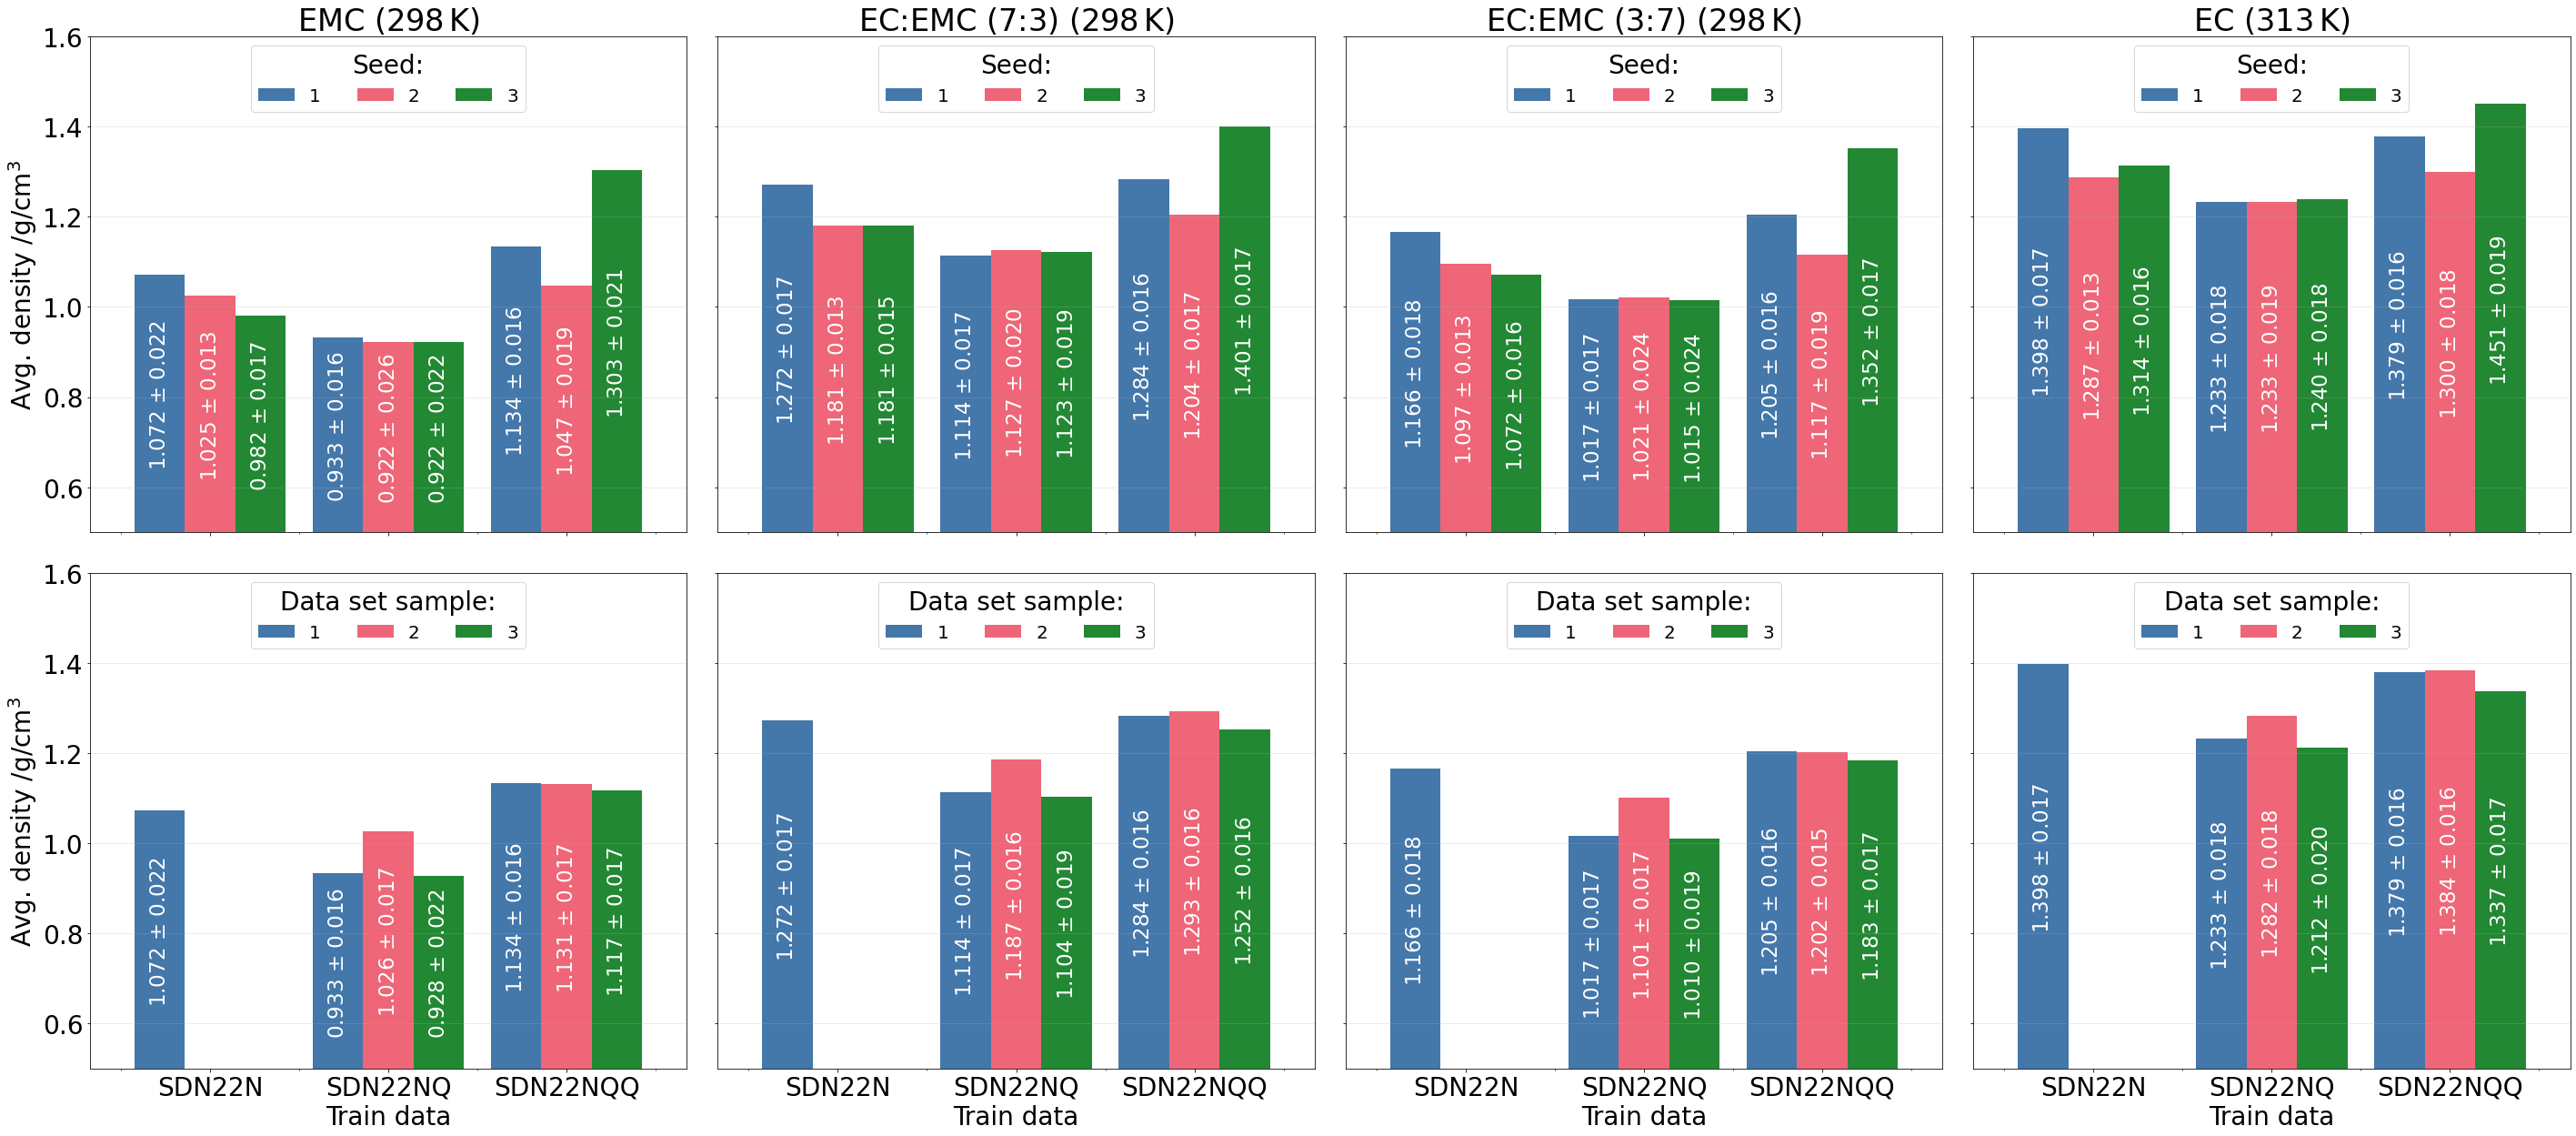

In [100]:
fsize = 28
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,4, figsize=(10*4, 9*2), sharey='row', sharex='col')


seed_df = df[df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.5,1.6],
        ylabel=f'Avg. density /{dunit}',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='center', padding=10, labels=dens_labels, color='white')


sample_df = df[df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.6],
        ylabel=f'Avg. density /{dunit}',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='center', padding=10, labels=dens_labels, color='white')

plt.tight_layout()

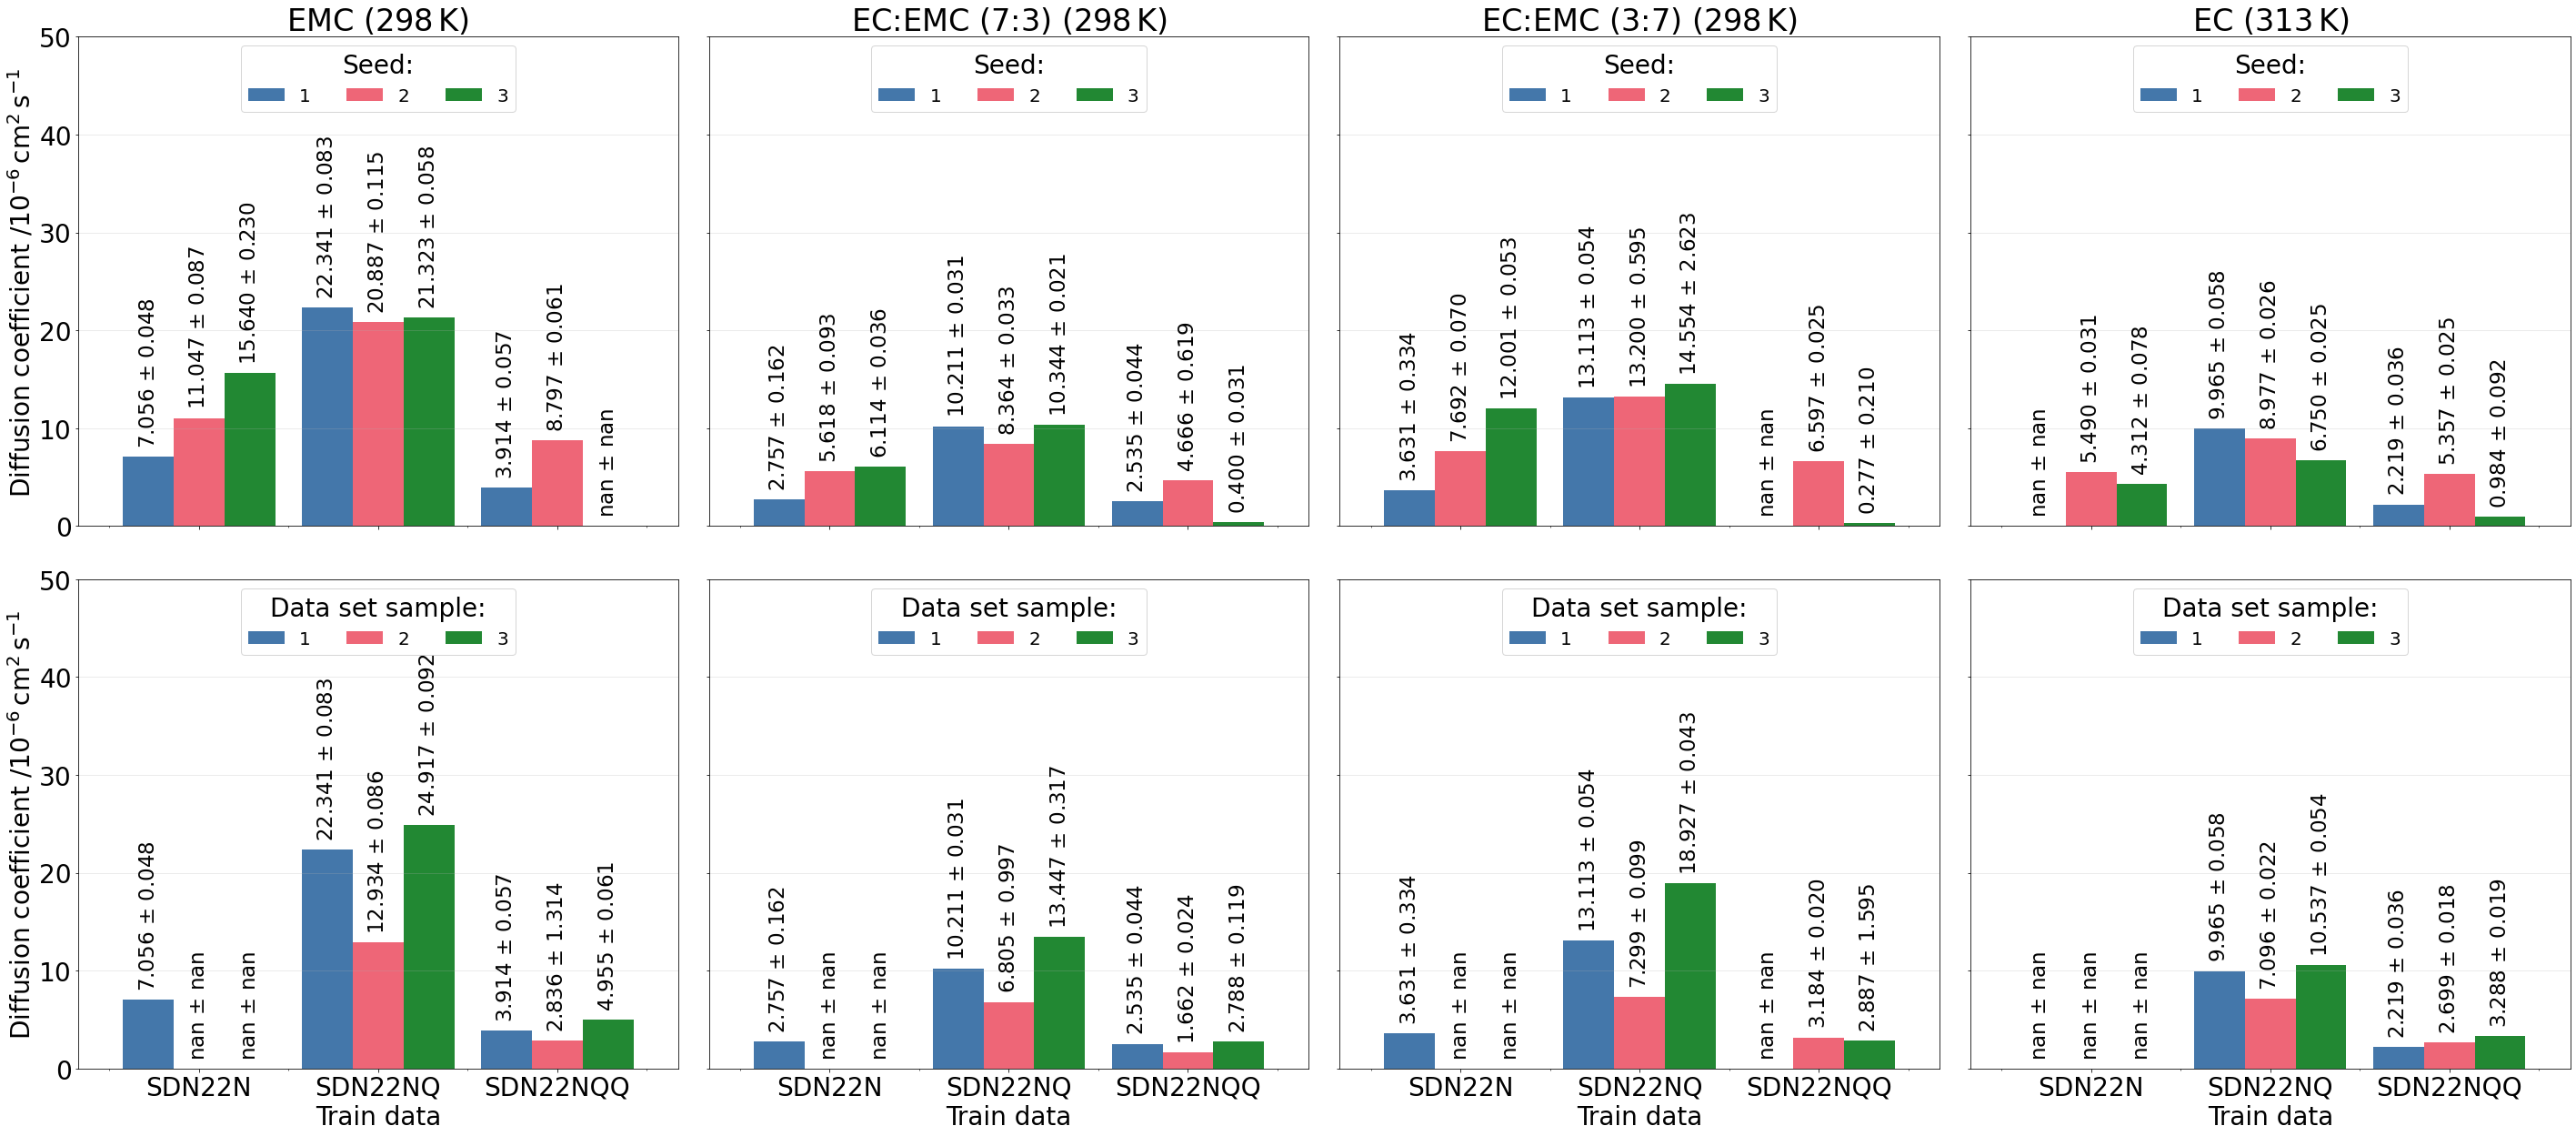

In [101]:
fsize = 28
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,4, figsize=(10*4, 9*2), sharey='row', sharex='col')


seed_df = df[df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,50],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

sample_df = df[df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    D_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diffusion coefficient',
    )#.sort_index(axis=0,ascending=False)#[order]
    err_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Diff. fit error',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = D_g.plot.bar(
        ylim=[0,50],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        #color=cset[3:],
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize-5, label_type='edge', padding=10, labels=diff_labels, color='black')

plt.tight_layout()

## Checking differences between functionals
Here we compare, for each data set (using the same seed in all cases) the effect the labels has on the output.

In [516]:
recomp_tags = [
    'SDN22NQQ/B97/SEED1/DSET1',
    'SDN22NQQ/B97/SEED1/DSET2',
    'SDN22NQQ/B97/SEED1/DSET3',
    #'SDN22NQQ/B97/SEED2/DSET1', missing
    #'SDN22NQQ/B97/SEED3/DSET1', missing
    'SDN22NQ/B97/SEED1/DSET1',
    'SDN22NQ/B97/SEED1/DSET2',
    'SDN22NQ/B97/SEED1/DSET3',
    #'SDN22NQ/B97/SEED2/DSET1', missing
    #'SDN22NQ/B97/SEED3/DSET1', missing
] # These tags needs to be adjusted to be compliant with zenodo

recomp_thermo = dict()
for tag in recomp_tags:
    recomp_thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

In [181]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(recomp_thermo):
    tag = recomp_tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(recomp_thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=1e-3, min_steps=5e3)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.001
86359 99998 0.8025385428496817 3.6410162910989233e-10 1.7721092524618025e-11 0.8106687734253117
Using slope error thresold of: 0.001
93409 99998 0.6322508096807333 3.4276220114734267e-10 3.7209607134897357e-11 0.6405668411508496
Using slope error thresold of: 0.001
53590 99998 0.9789508924176967 4.082624942484297e-10 3.2679149988405254e-12 0.9789536180343408
Using slope error thresold of: 0.001
78322 99998 0.9029410705166332 5.916736966611848e-10 1.48847882544097e-11 0.9097712607381341
Using slope error thresold of: 0.001
62102 99999 0.9783246959180845 9.402320129268223e-10 8.791278125308556e-12 0.9766057706415707
Using slope error thresold of: 0.001
97889 99999 0.23707197896543025 1.10804630544079e-09 5.078586117496457e-10 0.23818175267394295
Using slope error thresold of: 0.001
46400 99999 0.9832272888816344 8.130533480580633e-10 5.278768676945539e-12 0.9839264430691098
Using slope error thresold of: 0.001
79936 99999 0.9319475895948836 1.13249554

In [518]:
try:
    cf = pd.read_pickle("./part3a_opt_cluster-b97.pkl")
except:
    cf, dunit = get_density(recomp_tags, dynamics_path, std=True)
    cf['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
    cf['Diff. fit error'] = [e*1e10 for e in diff_errs]
    cf['log-log r2'] = log_r2
    cf['Diff. r2'] = diff_r2
    cf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
    pd.to_pickle(cf, "./part3a_opt_cluster-b97.pkl")
cf.style.map(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,B97,1,1,"EMC (298$\,$K)",1.097276,0.015692,3.641016,0.177211,0.802539,0.810669,0.863600
1,SDN22NQQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.134148,0.015030,3.427622,0.372096,0.632251,0.640567,0.934100
2,SDN22NQQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.181375,0.016095,4.082625,0.032679,0.978951,0.978954,0.535910
3,SDN22NQQ,B97,1,1,"EC (313$\,$K)",1.238221,0.015759,5.916737,0.148848,0.902941,0.909771,0.783230
4,SDN22NQQ,B97,1,2,"EMC (298$\,$K)",1.014228,0.016647,9.402320,0.087913,0.978325,0.976606,0.621030
5,SDN22NQQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",1.055083,0.017535,11.080463,5.078586,0.237072,0.238182,0.978900
6,SDN22NQQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.113526,0.018982,8.130533,0.052788,0.983227,0.983926,0.464000
7,SDN22NQQ,B97,1,2,"EC (313$\,$K)",1.170601,0.019168,11.324955,0.257234,0.931948,0.930378,0.799370
8,SDN22NQQ,B97,1,3,"EMC (298$\,$K)",0.963329,0.021163,16.321223,7.050830,0.190143,0.183664,0.967020
9,SDN22NQQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",1.023650,0.021914,10.341338,0.071118,0.984695,0.978389,0.354050


In [519]:
data_mask = df['Train data'] != 'SDN22N'
seed_mask = df['Seed'] == 1

wB97_df = df[data_mask & seed_mask]

comps = [
    'EMC (298$\,$K)',
    #'EC:EMC (3:7) (298$\,$K)', 
    #'EC:EMC (7:3) (298$\,$K)',
    'EC (313$\,$K)',
]

ef = pd.concat([cf, wB97_df])#.reset_index()
#EMC_mask = ef['Composition'] == comps[0]
#EC_mask = ef['Composition'] == comps[-1]
#ef = ef[EC_mask | EMC_mask]
ef

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,B97,1,1,"EMC (298$\,$K)",1.097276,0.015692,3.641016,0.177211,0.802539,0.810669,0.86360
1,SDN22NQQ,B97,1,1,"EC:EMC (3:7) (298$\,$K)",1.134148,0.015030,3.427622,0.372096,0.632251,0.640567,0.93410
2,SDN22NQQ,B97,1,1,"EC:EMC (7:3) (298$\,$K)",1.181375,0.016095,4.082625,0.032679,0.978951,0.978954,0.53591
3,SDN22NQQ,B97,1,1,"EC (313$\,$K)",1.238221,0.015759,5.916737,0.148848,0.902941,0.909771,0.78323
4,SDN22NQQ,B97,1,2,"EMC (298$\,$K)",1.014228,0.016647,9.402320,0.087913,0.978325,0.976606,0.62103
5,SDN22NQQ,B97,1,2,"EC:EMC (3:7) (298$\,$K)",1.055083,0.017535,11.080463,5.078586,0.237072,0.238182,0.97890
6,SDN22NQQ,B97,1,2,"EC:EMC (7:3) (298$\,$K)",1.113526,0.018982,8.130533,0.052788,0.983227,0.983926,0.46400
7,SDN22NQQ,B97,1,2,"EC (313$\,$K)",1.170601,0.019168,11.324955,0.257234,0.931948,0.930378,0.79937
8,SDN22NQQ,B97,1,3,"EMC (298$\,$K)",0.963329,0.021163,16.321223,7.050830,0.190143,0.183664,0.96702
9,SDN22NQQ,B97,1,3,"EC:EMC (3:7) (298$\,$K)",1.023650,0.021914,10.341338,0.071118,0.984695,0.978389,0.35405


### SD22NQQ
#### Density

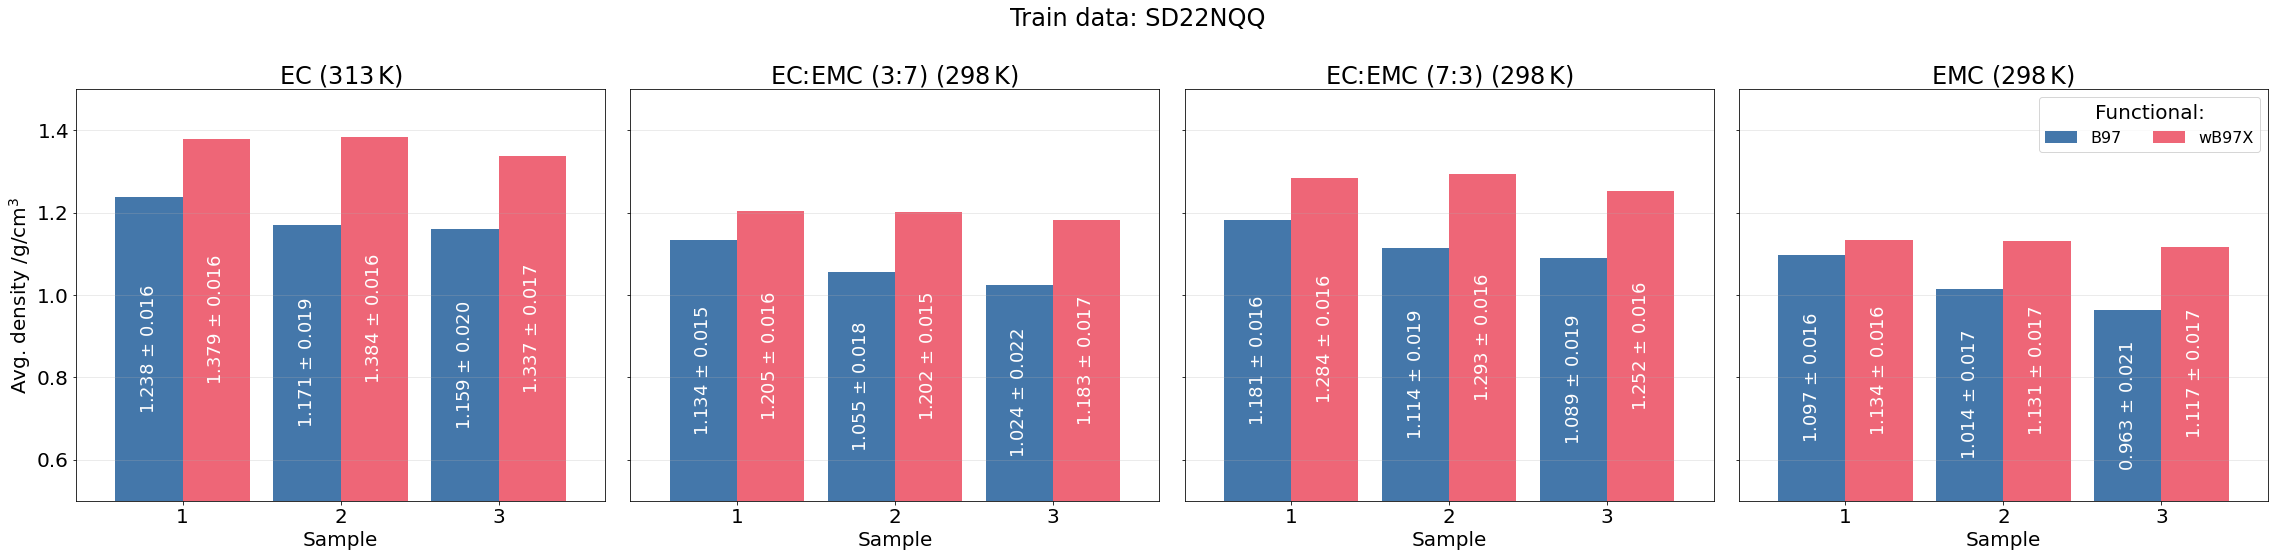

In [520]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQQ_functional_comp = ef[ef['Train data'] == 'SDN22NQQ']

fig.suptitle('Train data: SD22NQQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQQ_functional_comp.groupby('Composition')):
    ax.set_title(n)
    avg_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Avg. density',
    ).sort_index(axis=0,ascending=True)#[order]
    std_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Std. density',
    ).sort_index(axis=0,ascending=True)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset,
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-2, label_type='center', padding=0, labels=dens_labels, color='white')

axs[-1].legend(title='Functional:', ncols=3, loc='upper right', fontsize=fsize-4)
plt.tight_layout()

#### Diffusivity

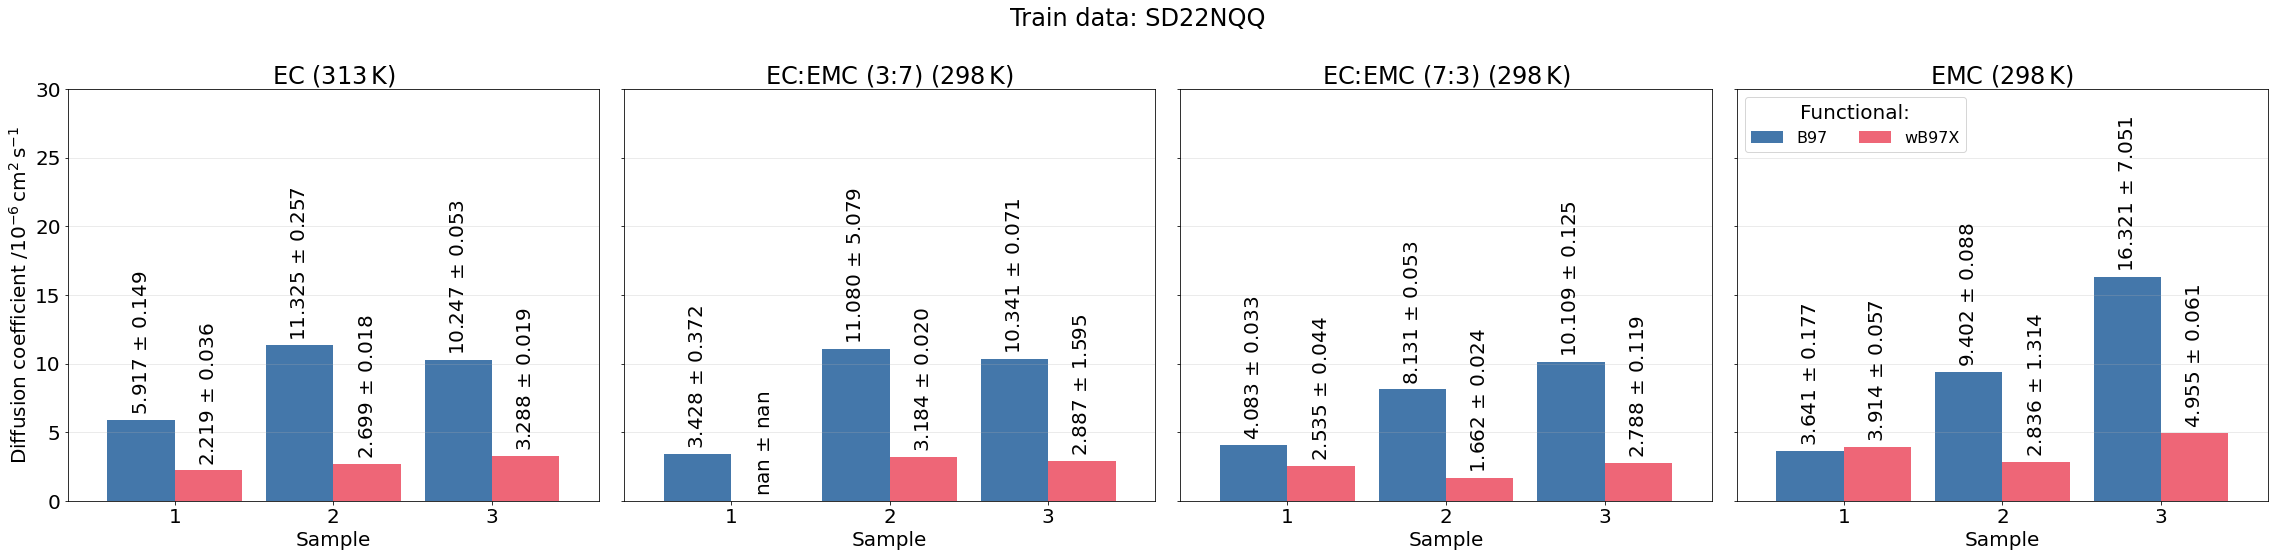

In [521]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQQ_functional_comp = ef[ef['Train data'] == 'SDN22NQQ']

fig.suptitle('Train data: SD22NQQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQQ_functional_comp.groupby('Composition')):
    D_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=True)#[order]
    err_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=True)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,30],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='edge', padding=5, labels=diff_labels, color='black')

axs[-1].legend(title='Functional:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()

### SD22NQ
#### Density

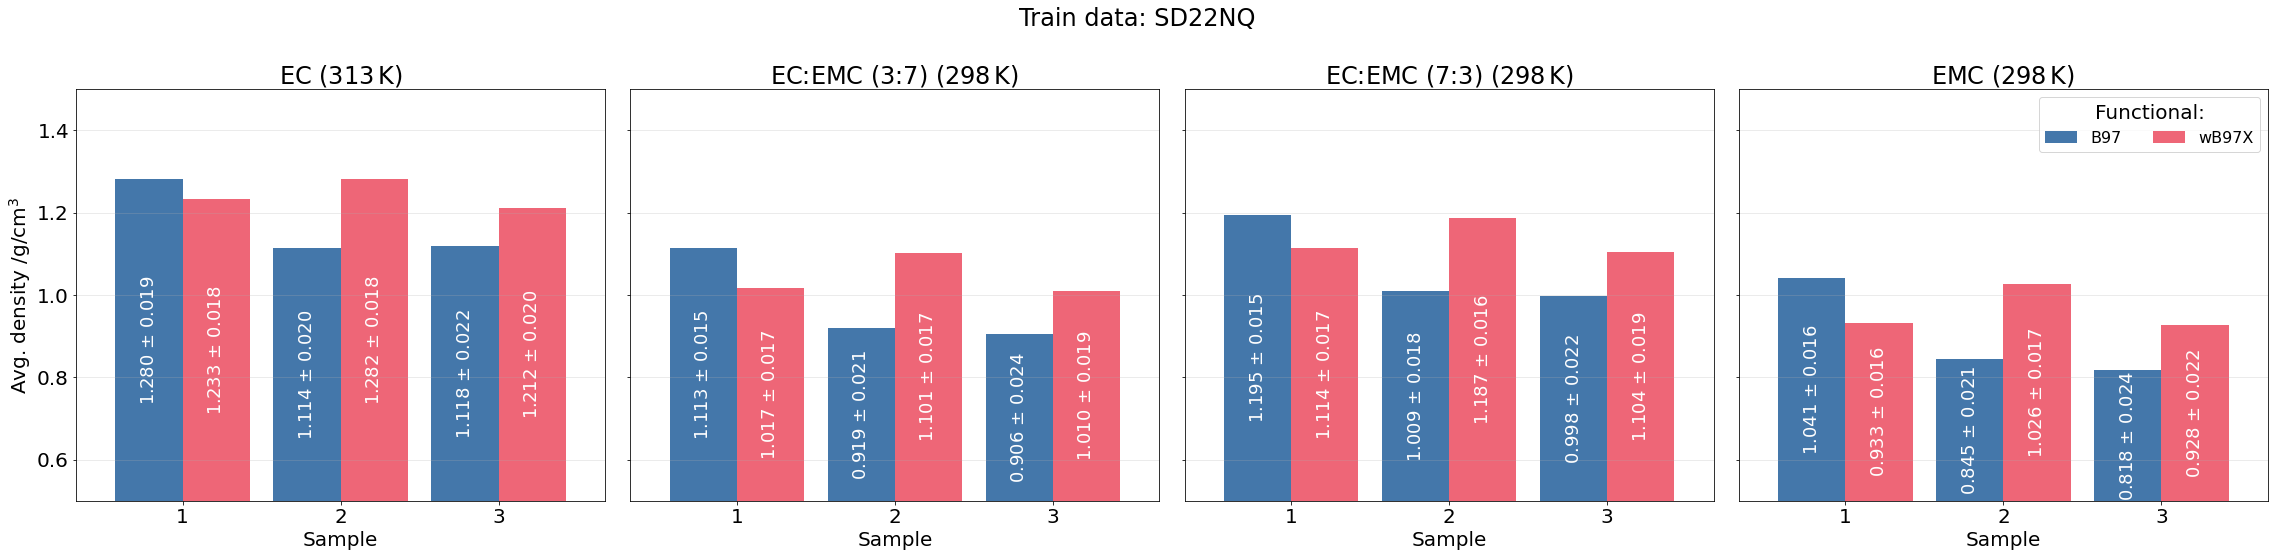

In [452]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQ_functional_comp = ef[ef['Train data'] == 'SDN22NQ']

fig.suptitle('Train data: SD22NQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQ_functional_comp.groupby('Composition')):
    ax.set_title(n)
    avg_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Avg. density',
    ).sort_index(axis=0,ascending=True)#[order]
    std_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Std. density',
    ).sort_index(axis=0,ascending=True)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.5,1.5],
        ylabel=f'Avg. density /{dunit}',
        color=cset,
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-2, label_type='center', padding=0, labels=dens_labels, color='white')

axs[-1].legend(title='Functional:', ncols=3, loc='upper right', fontsize=fsize-4)
plt.tight_layout()

#### Diffusivity

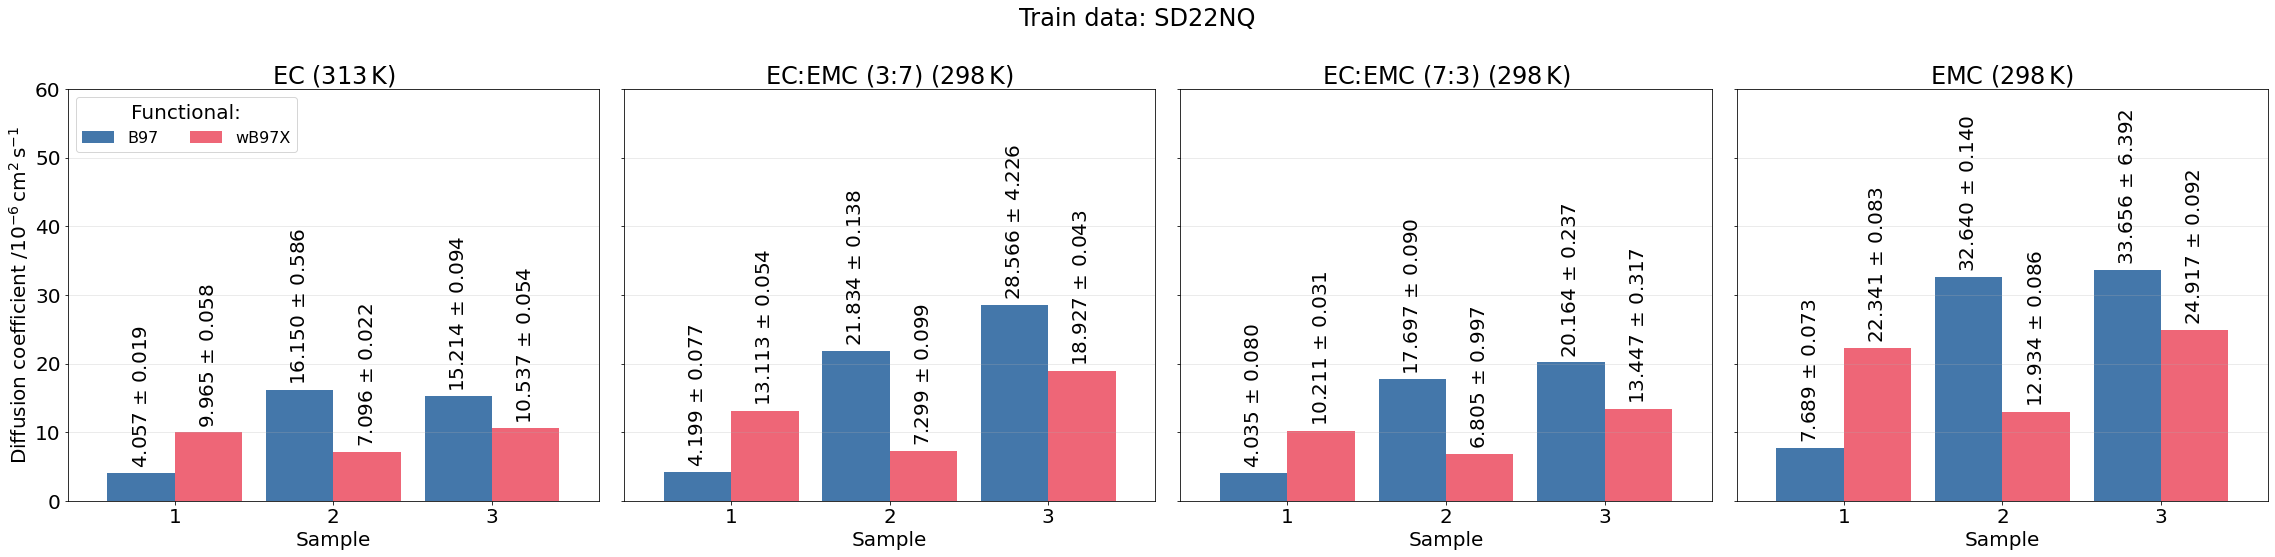

In [526]:
fsize = 20
plt.rcParams.update({'font.size': fsize})



fig, axs = plt.subplots(1,4, figsize=(8*4, 8*1), sharey=True)

SD22NQ_functional_comp = ef[ef['Train data'] == 'SDN22NQ']

fig.suptitle('Train data: SD22NQ')
#for ax, (n,g) in zip(axs, reversed(list(SD22NQ_functional_comp.groupby('Composition')))):
for ax, (n,g) in zip(axs, SD22NQ_functional_comp.groupby('Composition')):
    D_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diffusion coefficient',
    ).sort_index(axis=0,ascending=True)#[order]
    err_g = g.pivot(
        index='Sample',
        columns='Functional',
        values='Diff. fit error',
    ).sort_index(axis=0,ascending=True)#[order]
    a0 = D_g.plot.bar(
        title=n,
        ylim=[0,60],
        ylabel=f'Diffusion coefficient /$10^{{-6}}\\,\\text{{cm}}^2\\,\\text{{s}}^{{-1}}$',
        rot=0,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)

    for i, c in enumerate(a0.containers):
        col_name = D_g.columns[i]
        diff_vals = D_g[col_name]
        diff_erros = err_g[col_name]
        diff_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(diff_vals, diff_erros)]
        ax.bar_label(c, rotation=90, fontsize=fsize, label_type='edge', padding=5, labels=diff_labels, color='black')

axs[0].legend(title='Functional:', ncols=3, loc='upper left', fontsize=fsize-4)
plt.tight_layout()